Il codice nella cella seguente **deve essere eseguito**, ma **non deve essere modificato**, perché essenziale per un'esecuzione senza errori del successivo codice del laboratorio. Dopo averlo eseguito, attendi che il pallino adiacente ad R in alto a destra diventi bianco o che scompaia il simbolo [*].

In [1]:
#Esegui ma non modificare. Attendi  che scompaia il simbolo [*] 
#o che il pallino adiacente ad R in alto a destra diventi bianco
#potrebbe essere necessario qualche minuto
source('lib1/preamble.R')

# Data visualization: `ggplot2`

In questa lezione, ti introdurrò alla visualizzazione delle informazioni di un data set (*data visualization*) mediante l'uso del pacchetto `ggplot2` contenuto in `tidyverse`, che, tuttavia, non è l'unico strumento di rappresentazione grafica del contenuto di un data set. Tra i metodi alternativi a `ggplot2` ci sono 

* le funzioni di base di R, come fatto nella seconda lezione;
* pacchetti dedicati come `lattice`, `plotly` (plot interattivi), `rgl` (per plot tridimensionali).

## `ggplot2`

`ggplot2` implementa la cosiddetta *grammar of graphics* (da cui le iniziali del nome del pacchetto) che è un sistema coerente per descrivere e costruire grafici. In pratica,  è un sistema che segue un approccio in layer stratificati per descrivere e costruire visualizzazioni dei dati in maniera strutturata.  

Essendo parte del pacchetto `tidyverse` può essere caricato mediante l'istruzione

In [2]:
library(tidyverse)

Per cominciare, usiamo il data frame `mpg`, contenuto nel pacchetto `ggplot2`.
Il comando `?mpg` può ovviamente essere eseguito per ottenere il contenuto del data set e la descrizione delle sue colonne.

La colonna `fl` contiene i seguenti tipi di carburante:

* "e": etanolo E85
* "d": diesel
* "r": regular
* "p": premium
* "c": gas naturale compresso (CNG) (metano)

In [3]:
#Esplora i dati 
str(mpg)
summary(mpg)
head(mpg)

tibble [234 × 11] (S3: tbl_df/tbl/data.frame)
 $ manufacturer: chr [1:234] "audi" "audi" "audi" "audi" ...
 $ model       : chr [1:234] "a4" "a4" "a4" "a4" ...
 $ displ       : num [1:234] 1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int [1:234] 1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int [1:234] 4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr [1:234] "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr [1:234] "f" "f" "f" "f" ...
 $ cty         : int [1:234] 18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int [1:234] 29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr [1:234] "p" "p" "p" "p" ...
 $ class       : chr [1:234] "compact" "compact" "compact" "compact" ...


 manufacturer          model               displ            year     
 Length:234         Length:234         Min.   :1.600   Min.   :1999  
 Class :character   Class :character   1st Qu.:2.400   1st Qu.:1999  
 Mode  :character   Mode  :character   Median :3.300   Median :2004  
                                       Mean   :3.472   Mean   :2004  
                                       3rd Qu.:4.600   3rd Qu.:2008  
                                       Max.   :7.000   Max.   :2008  
      cyl           trans               drv                 cty       
 Min.   :4.000   Length:234         Length:234         Min.   : 9.00  
 1st Qu.:4.000   Class :character   Class :character   1st Qu.:14.00  
 Median :6.000   Mode  :character   Mode  :character   Median :17.00  
 Mean   :5.889                                         Mean   :16.86  
 3rd Qu.:8.000                                         3rd Qu.:19.00  
 Max.   :8.000                                         Max.   :35.00  
      hwy    

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


### Usa la funzione `ggplot()`

Il comando `ggplot()` 

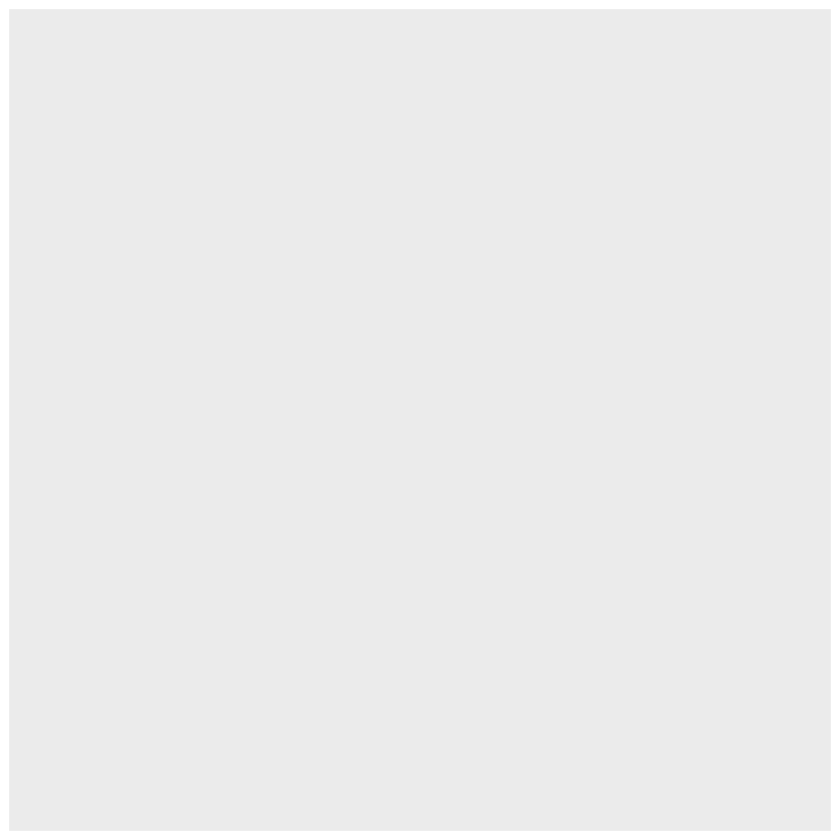

In [4]:
ggplot()

visto che non è stato specificato alcun parametro, produce un diagramma vuoto e grigio. 

Nei paragrafi successivi, mediante esempi, cerco di farti familiarizzare con i tre elementi principali della *grammar of graphics (gg): data, geometry, e mapping*, introdotti brutalmente nell'istruzione seguente mediante `data=`, `mapping=`  e `geom_point()`.

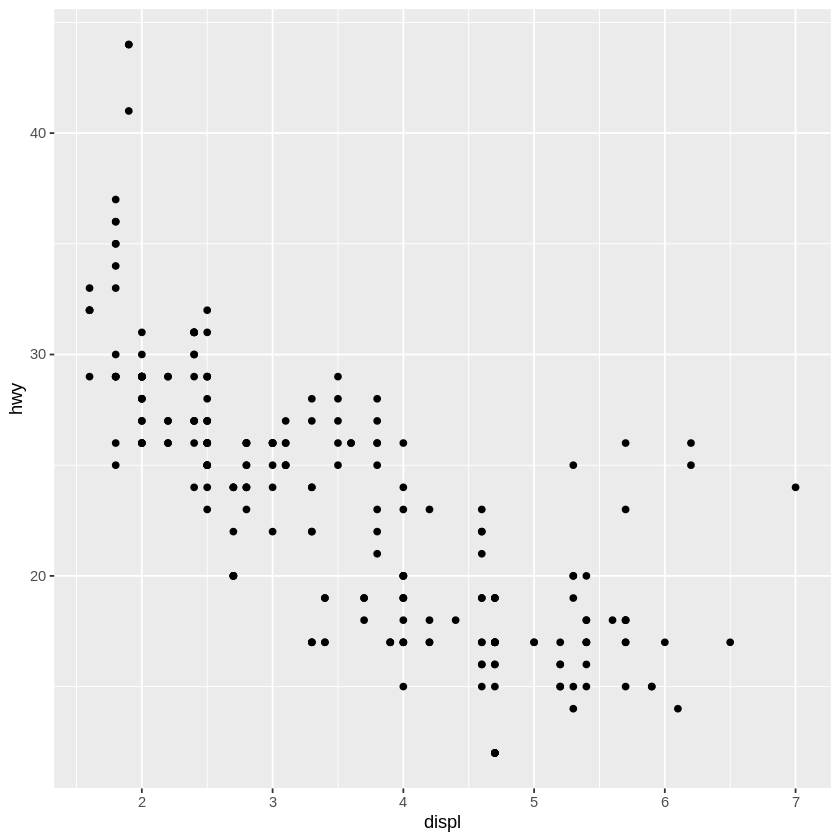

In [5]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy))

Di seguito ti introdurremo per gradi, tramite esempi, l'uso di questi tre elementi principali della *gg*. Nell'istruzione appena vista, abbiamo usato l'operatore `+`, che è differente dall'operatore pipe `%>%` (usato in `dplyr`) e serve ad aggiungere elementi, detti *layer*, al grafico. Un errore molto frequente è quello di scambiare i due operatori. Cominciamo con il primo elemento della *gg*.

### Data

L'input principale di `ggplot()` è l'argomento `data=` a cui deve essere assegnato un data frame (in questo caso `mpg`) tipicamente in formato `tidy` (ottenuto con il comando `pivot_longer()`). L'argomento  `data=` può essere inserito come primo argomento di `ggplot`  e non essere esplicitamente preceduto da `data=`.

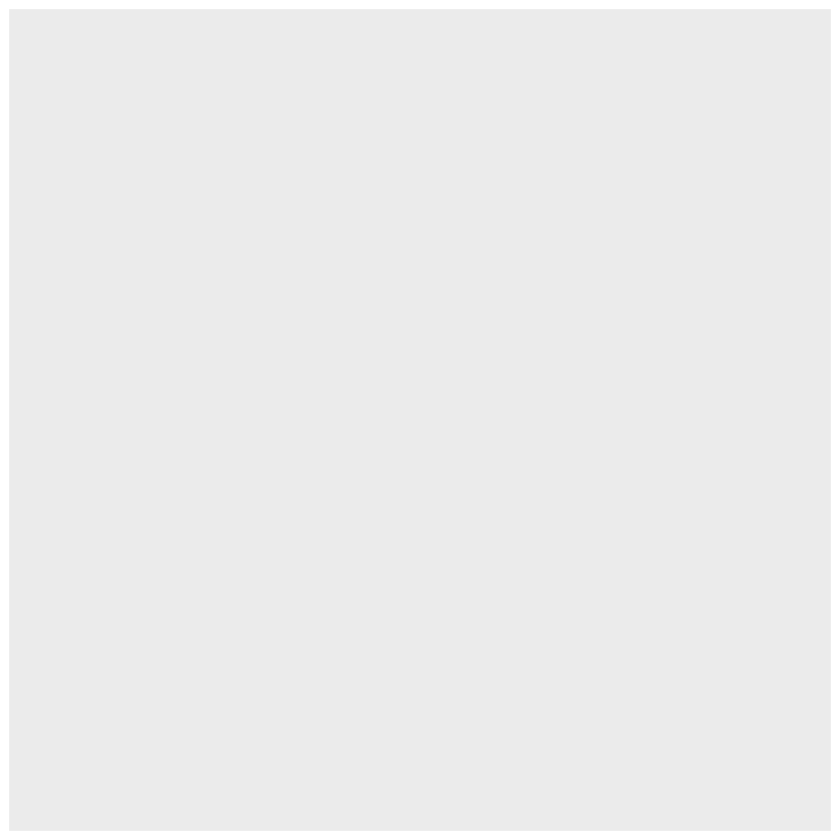

In [6]:
ggplot(data = mpg) # oppure ggplot(mpg)

Tuttavia, la precedente istruzione, sebbene sia stato definito l'elemento *data*, non produce un risultato diverso dall'istruzione `ggplot()`, se ad essa non viene aggiunto un layer di  tipo *geometry* (come fatto con  `geom_point()` nel primo esempio).

### Geometry

A questo punto è possibile aggiungere un layer di  tipo *geometry* mediante l'operatore `+` seguito da una funzione con il prefisso `geom_` che definisce se  il tipo di *geometry* da aggiungere al plot è di tipo punti, linee, barplot, istogrammi, boxplot, etc.

Oltre a `geom_point()`, tipici layer di tipo *geometry* sono definiti dai comandi 

* `geom_line()`
* `geom_histogram()`
* `geom_density()`
* `geom_boxplot()`
* `geom_bar()/geom_col()` 

che ti illustrerò in dettaglio di seguito tramite esempi. Altri esempi di *geometry* che non tratteremo negli esempi sono 

* `geom_segment()`
* `geom_path()`
* `geom_errorbar()`
* `geom_abline(), geom_hline(), geom_vline()`

Comunque, una volta che avrai appreso le basi, sarà facile imparare nuove funzioni!

Da subito ti informo che è possibile aggiungere diversi layers contemporaneamente.
Ma, prima di indicare il layer da aggiungere, è necessario specificare quali colonne del data frame specificato nell'argomento `data=` definiscono le coordinate e l'aspetto grafico di rappresentazione (*aesthetics*) attraverso l'argomento `mapping=`.

### Mapping

Ciascuna funzione con il prefisso `geom_` necessita dell'argomento `mapping=`, che, a sua volta, è sempre accoppiato alla funzione `aes()`, che sta per *aesthetics*, che specifica quale variabile viene mappata dalle proprietà grafiche.

I più comuni argomenti di `aes()` sono:

* x: la variabile da riportare sull'asse x 
* y: la variabile da riportare sull'asse y

Altri argomenti sono `colour`/`color`, `group`, `shape`, `size`, e `fill`.
Quando usi questi argomenti viene generata automaticamente una legenda.

Negli esempi che finalmente ti posso mostrare, in aggiunta a quanto detto precedentemente nella sezione *Data*, osserva che puoi lasciare vuota l'istruzione `ggplot()`  e inserire un argomento `data=` e `mapping=`  (eventualmente diverso) in ogni singolo layer *geometry*.

## Esempi di *grammar of graphics* (ggplot)

Una volta definiti i tre elementi di base della *grammar of graphics*, è possibile finalmente visualizzare graficamente il contenuto di un data set di interesse mediante  `ggplot()`. Di seguito, come già ti ho preannunciato vedremo come aggiungere i diversi layer di tipo *geometry* al comando `ggplot()` specificando `data=` e `mapping=` attraverso `aes()`.

### `geom_point()`

Mediante il seguente codice d'esempio è possibile:

* produrre uno scatter plot

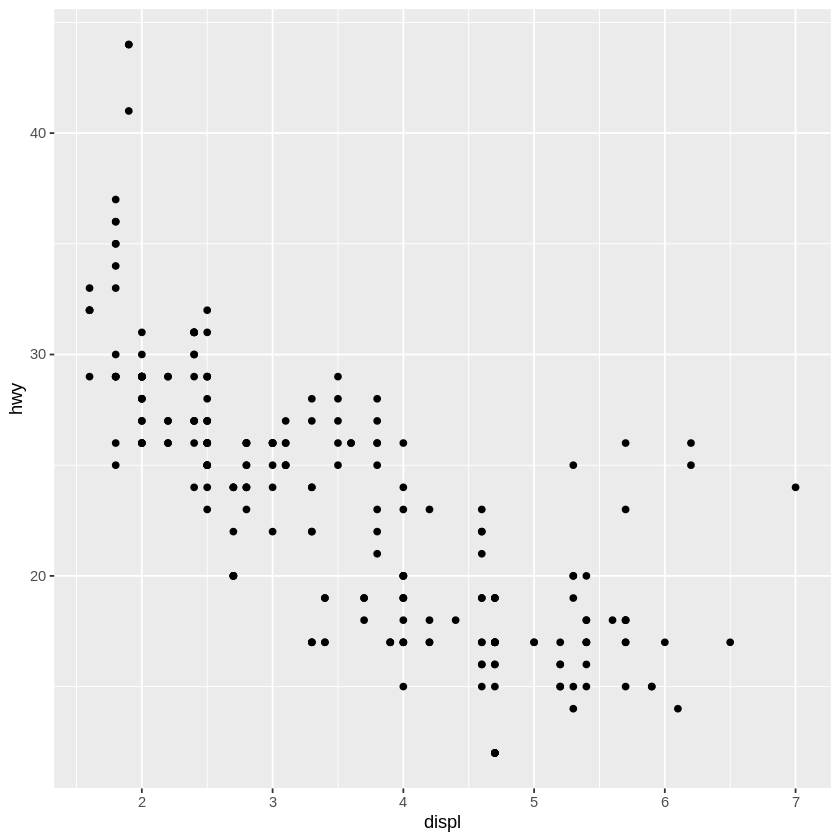

In [7]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy))

* colorare ciascun punto secondo il valore della classe (di tipo *factor*/categorico)

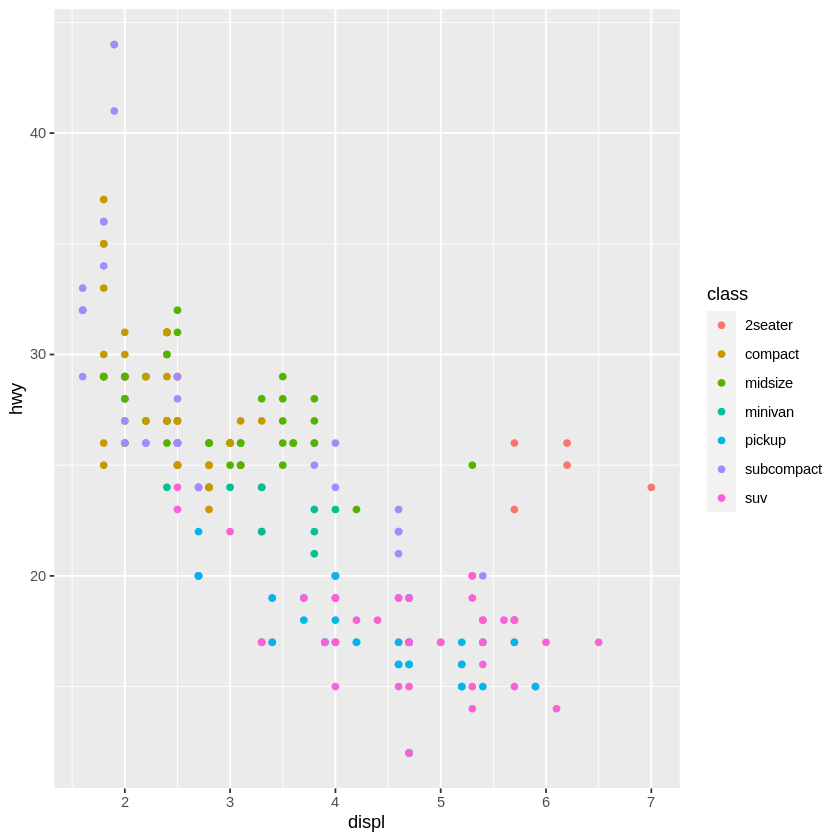

In [8]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy, colour = class))

* colorare  ciascun punto a seconda dell'anno

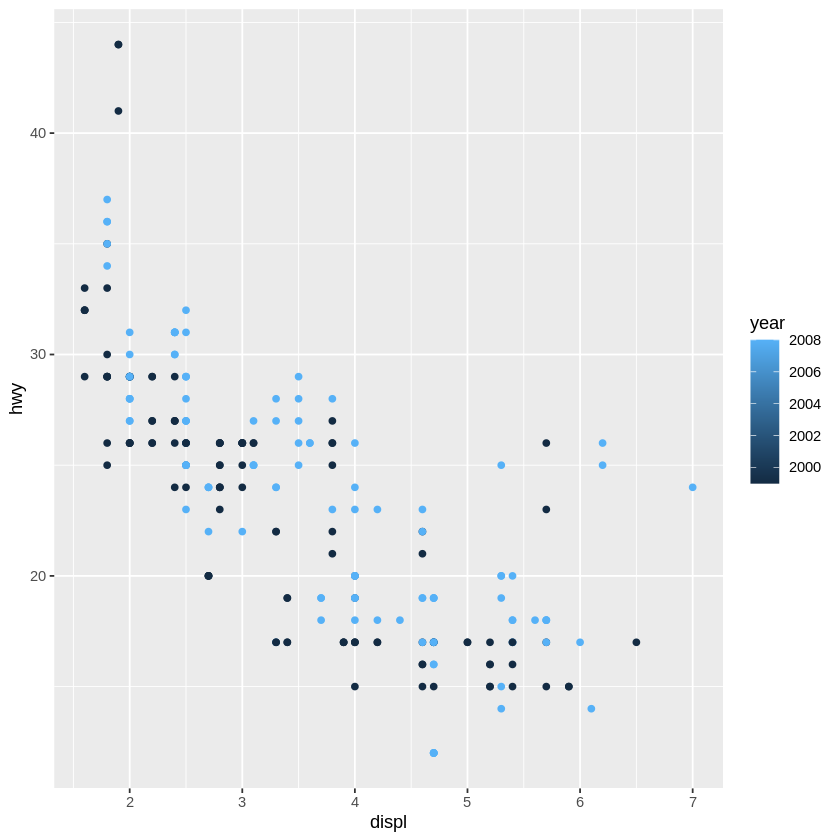

In [9]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy, colour = year))

* dare a ciascun punto una forma differente a seconda del valore nella colonna `drv` (possono essere impiegate solo variabili categoriche).

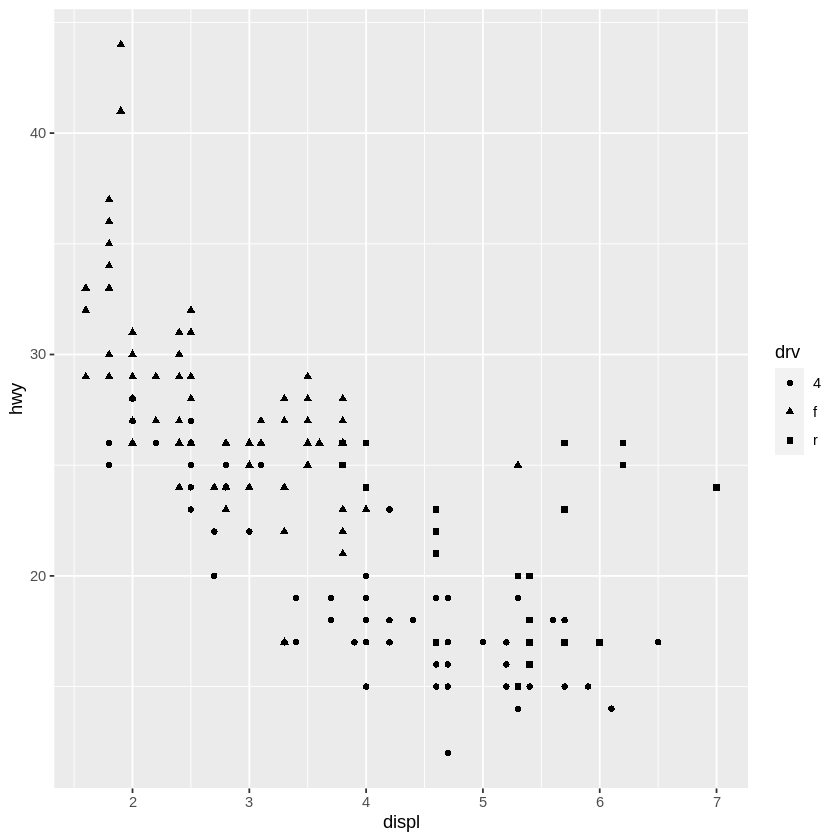

In [10]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy, shape = drv))

* regolare la dimensione di ciascun punto in base alla colonna `cty`.

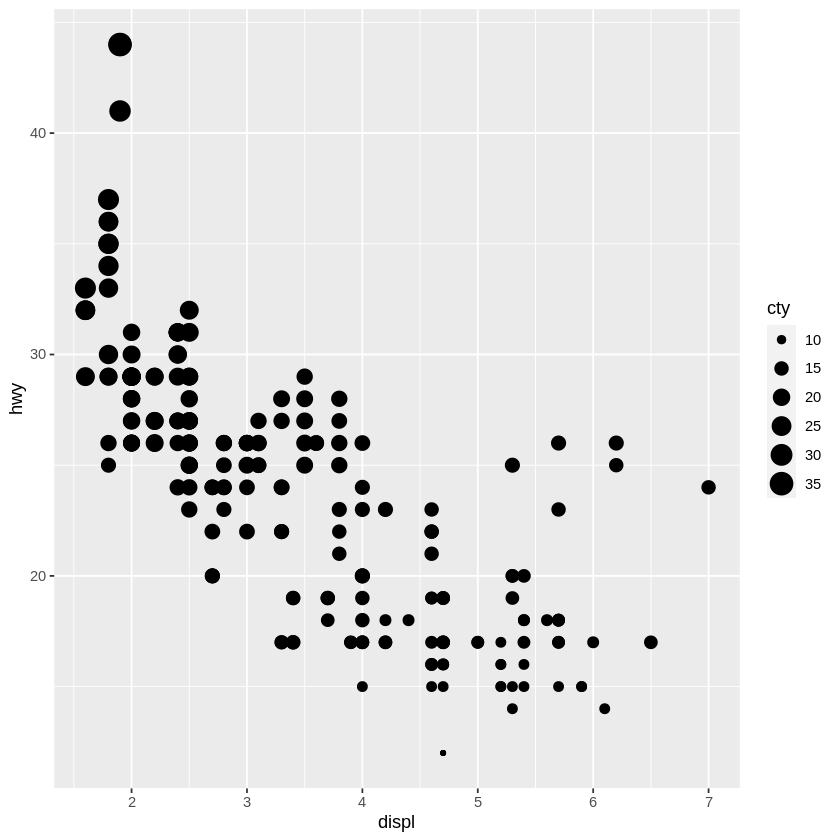

In [11]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy, size = cty))

Inoltre, mediante il parametro  `alpha`, puoi controllare il livello di trasparenza dei punti diagrammati.

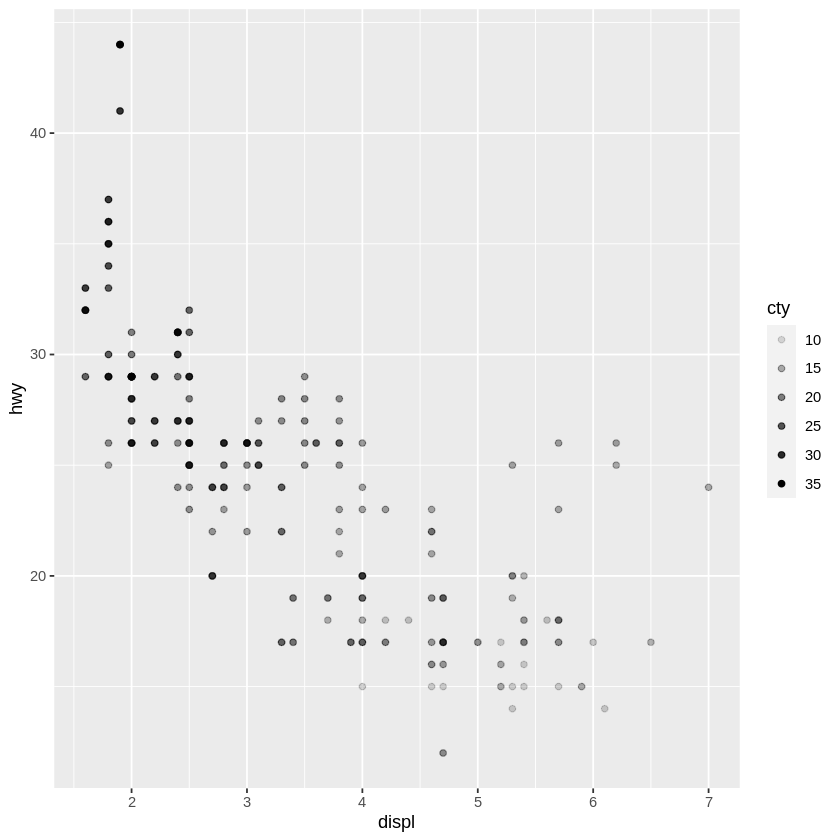

In [12]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy, alpha = cty))

È possibile

* combinare differenti estetiche (`aes()`)

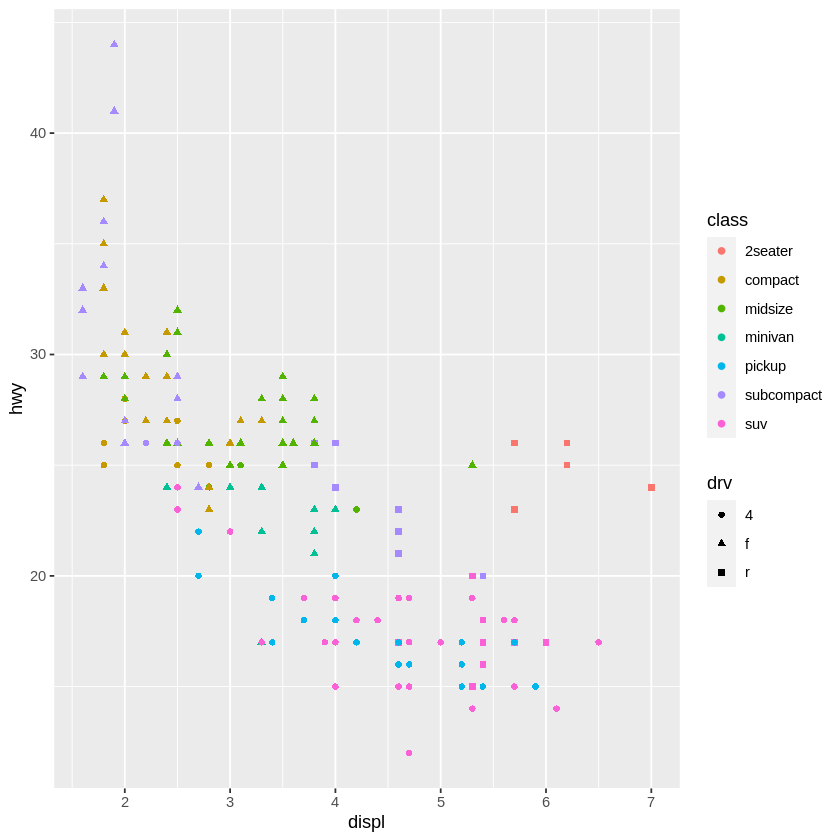

In [13]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy, colour = class, shape = drv))

###  Utilizzare variabili categoriche come x o y

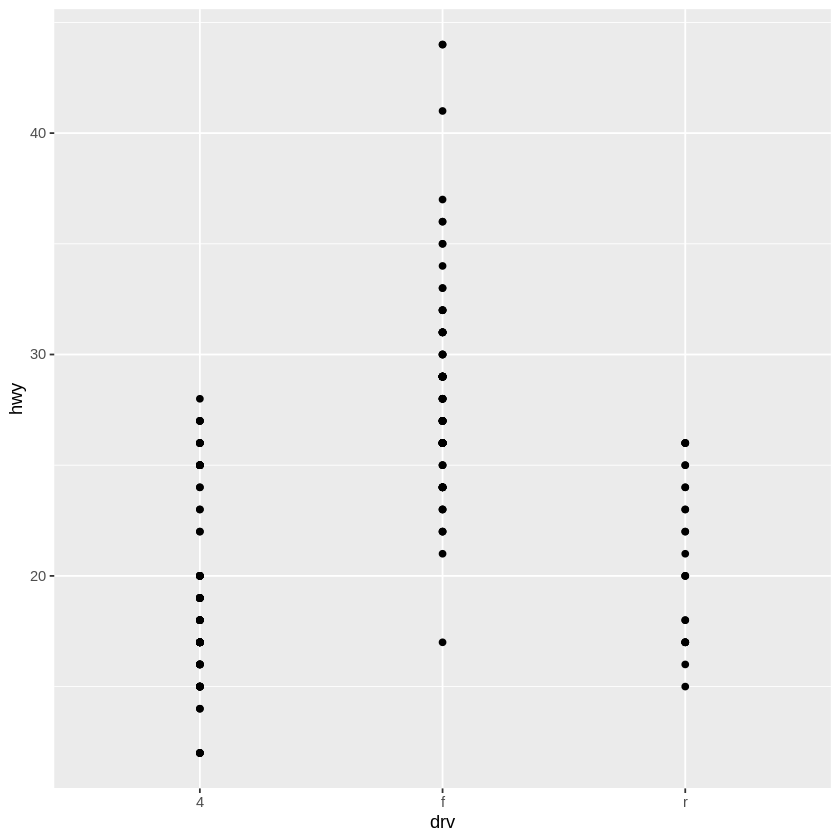

In [14]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = drv, y = hwy))

### geom_line(): grafici a linee

Importiamo il data set della serie A 2019-2020 e convertiamo mediante il comando `mutate` la classe della colonna `Date` da `character` a `Date`, che è un opportuno formato/classe per gestire le date.

In [15]:
df <- read_csv("data/serie_A_2019_2020.csv")
class(df$Date)

Parsed with column specification:
cols(
  .default = col_double(),
  Div = col_character(),
  Date = col_character(),
  Time = col_time(format = ""),
  HomeTeam = col_character(),
  AwayTeam = col_character(),
  FTR = col_character(),
  HTR = col_character()
)

See spec(...) for full column specifications.



[1] "character"

Il messaggio precedente non è un errore, ma un warning che puntualizza semplicemente come siano state interpretate le colonne del data set importato mediante `read_csv()`. 

Se hai bisogno di modificare la classe di qualche colonna, come in questo caso per la colonna `Date` puoi intervenire col comando `mutate(df, Date = as.Date(Date, format = "%d/%m/%Y"))`

In [16]:
df <- mutate(df, Date = as.Date(Date, format = "%d/%m/%Y"))
class(df$Date)

[1] "Date"

Altrimenti puoi intervenire con un'istruzione più complessa e modificare dove necessario. Per esempio copiando e incollando opportunamente il warning precedente e modificando `Date = col_character()` in `Date = col_date(format = "%d/%m/%Y")`. In tal modo si evita il warning.

In [17]:
df <- read_csv("data/serie_A_2019_2020.csv",
    col_types = cols(
  .default = col_double(),
  Div = col_character(),
  Date = col_date(format = "%d/%m/%Y"), #questa sostituisce mutate(df, Date = as.Date(Date, format = "%d/%m/%Y")
  Time = col_time(format = ""),
  HomeTeam = col_character(),
  AwayTeam = col_character(),
  FTR = col_character(),
  HTR = col_character()
))


Per esercizio, visualizza il *numero di goal realizzati dalla squadra di casa* (FTHG) nei diversi giorni 

* mediante `geom_point()` 

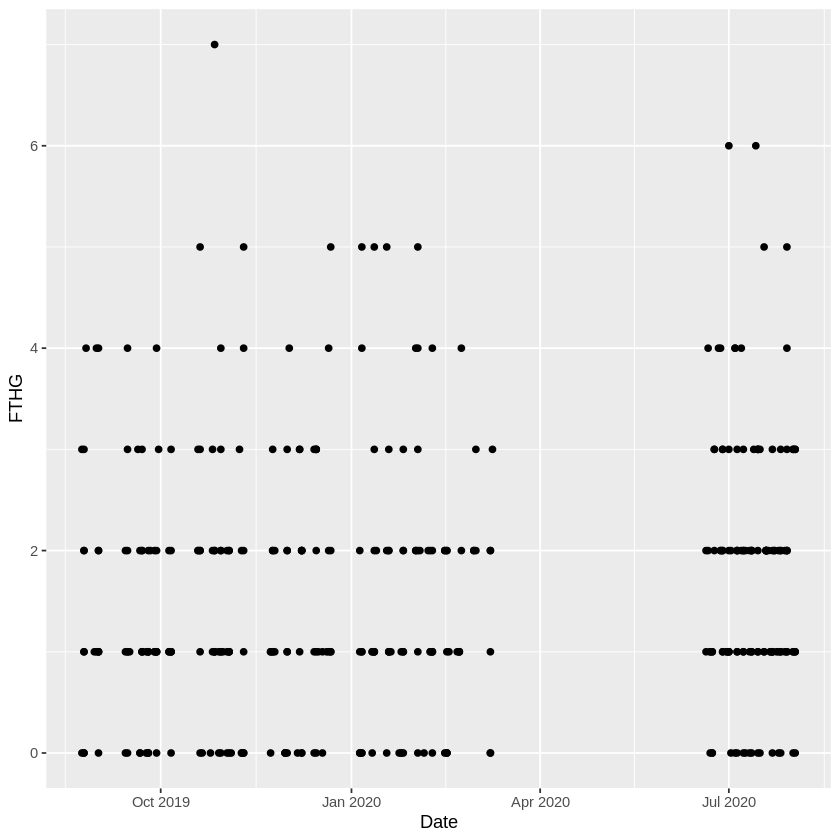

In [18]:
ggplot(data = df) +
  geom_point(mapping = aes(x = Date, y = FTHG))

* mediante `geom_line()`

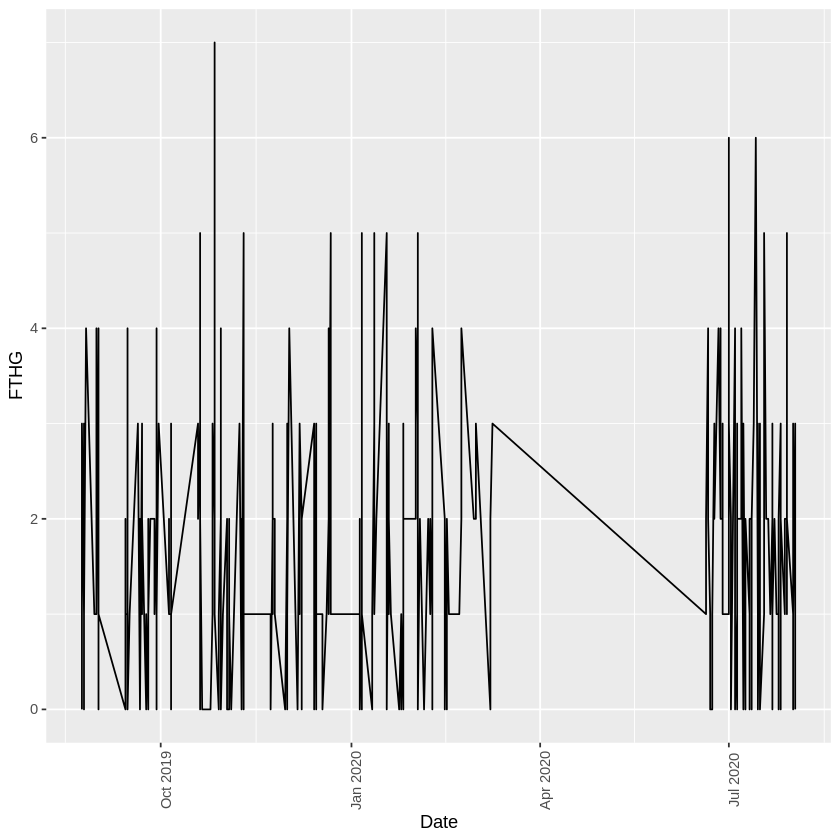

In [19]:
ggplot(data = df) +
  geom_line(mapping = aes(x = Date, y = FTHG))+
theme(axis.text.x = element_text(angle = 90)) #serve solo a ruotare le etichette degli assi

Il grafico prodotto dalla precedente istruzione è di difficile lettura. Per distinguere i differenti teams è, in questo caso, consigliato l'utilizzo di altri parametri/proprietà `aes()`. Tuttavia, la seguente istruzione non migliora di molto la leggibilità, data la numerosità delle squadre in gioco.

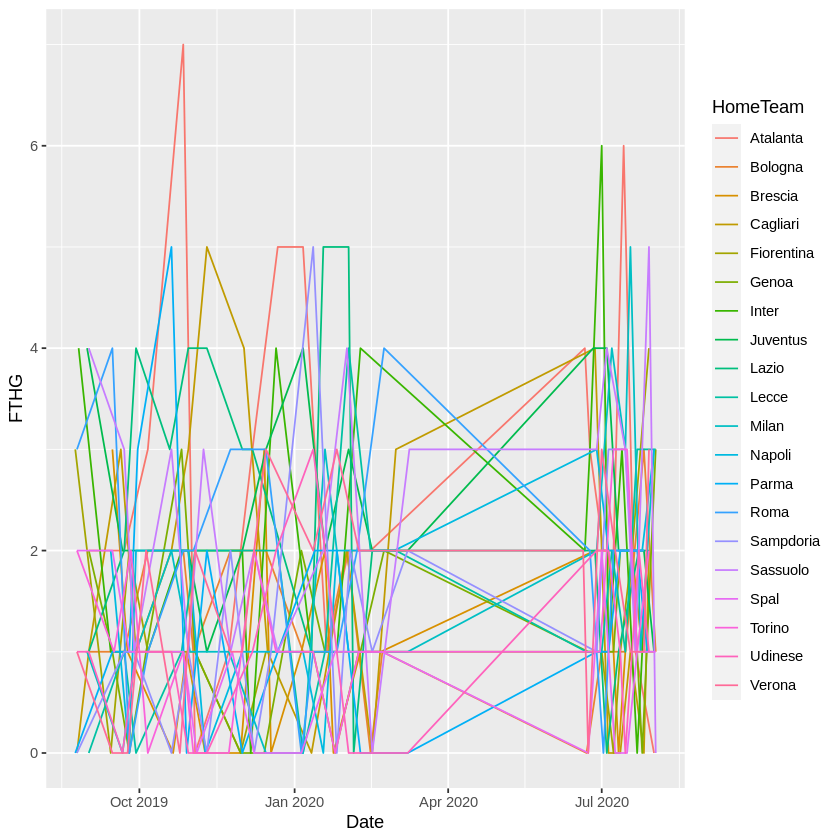

In [20]:
ggplot(data = df) +
  geom_line(mapping = aes(x = Date, y = FTHG, colour = HomeTeam))

Puoi allora immaginare di considerare solo alcune squadre mediante la funzione `filter()` e fornirle in input a `ggplot()`, come nell'esempio seguente

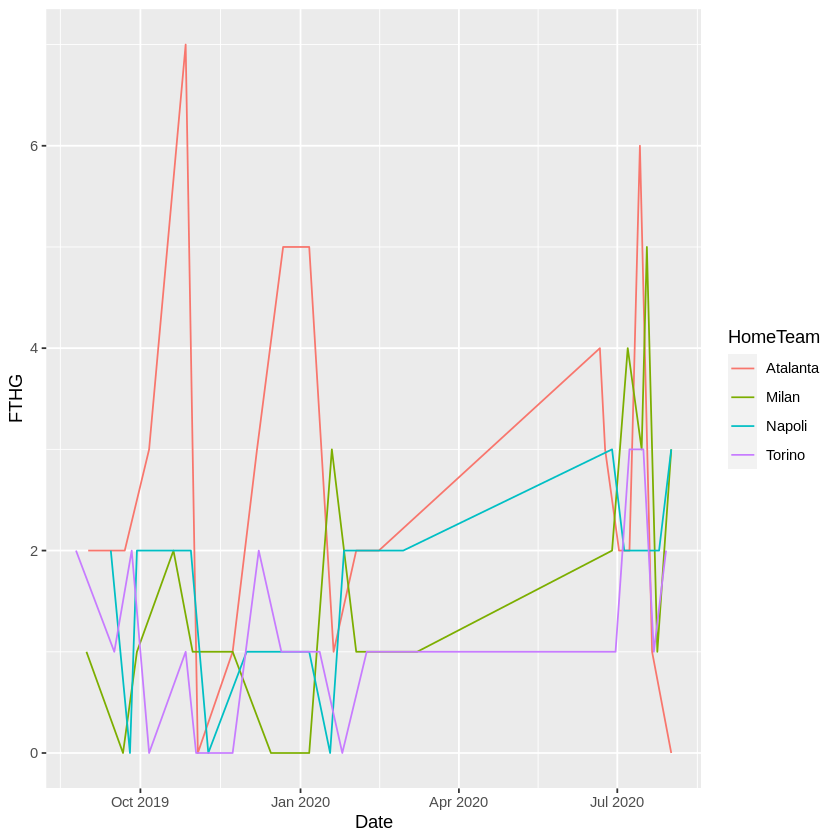

In [21]:
df %>% 
  filter(HomeTeam %in% c("Napoli", "Atalanta", "Torino", "Milan")) %>% 
  ggplot +
  geom_line(mapping = aes(x = Date, y = FTHG, colour = HomeTeam))

Usa l'argomento `group=` di `aes()` per visualizzare linee di tipo differente per ciascun gruppo, ma usando sempre lo stesso colore, senza legenda.

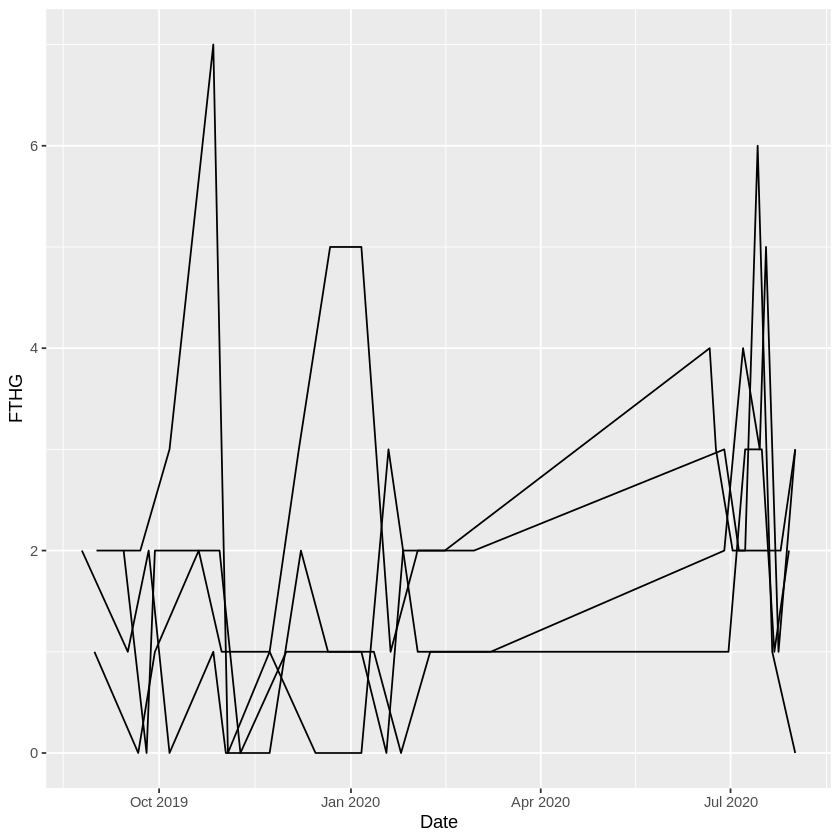

In [22]:
df %>% 
  filter(HomeTeam %in% c("Napoli", "Atalanta", "Torino", "Milan")) %>% 
  ggplot +
  geom_line(mapping = aes(x = Date, y = FTHG, group = HomeTeam))

Potresti usare anche altri *aesthetics* (argomenti di `aes()`) e mappare la variabile `HomeTeam` attraverso, per esempio, `linetype = HomeTeam` (tipo di linea) e/o `colour = HomeTeam`.

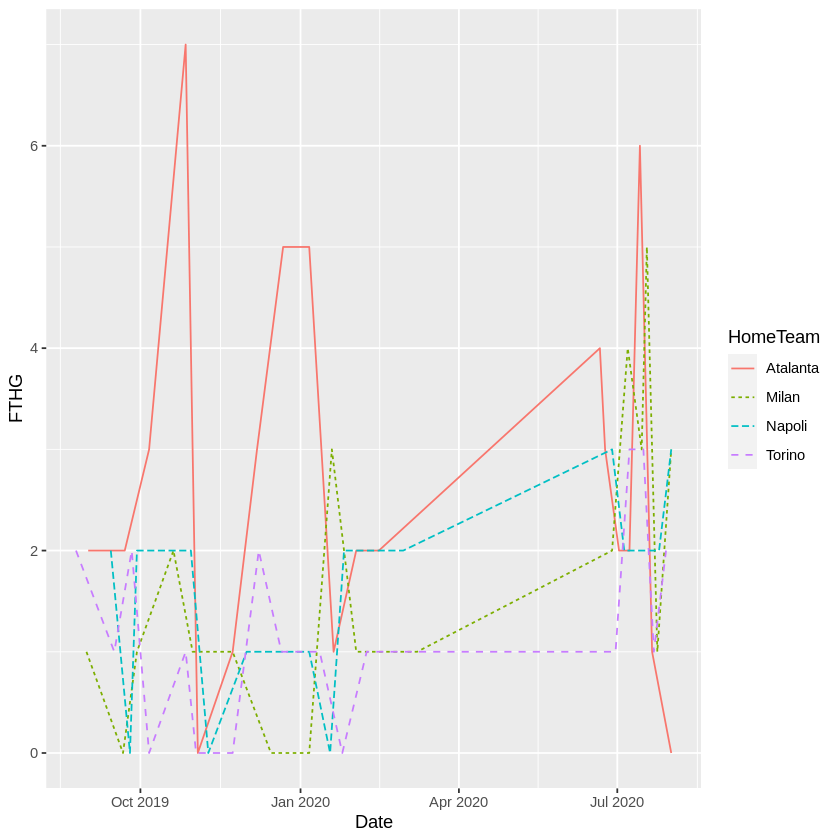

In [23]:
df %>% 
  filter(HomeTeam %in% c("Napoli", "Atalanta", "Torino", "Milan")) %>% 
  ggplot +
  geom_line(mapping = aes(x = Date, y = FTHG, linetype = HomeTeam, colour = HomeTeam))

oppure `lwd = HomeTeam` (spessore della linea), che, tuttavia, genera un warning perché si aspetta una variabile/colonna di tipo `numeric` e di tipo/classe `factor`.

### `geom_histogram()` e `geom_density()`

`geom_histogram()` aggiunge un *layer/geometry* di tipo *istogramma* e pertanto non richiede  la definizione dell'argomento `y` ma  solo di `x`, come nell'esempio che segue

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



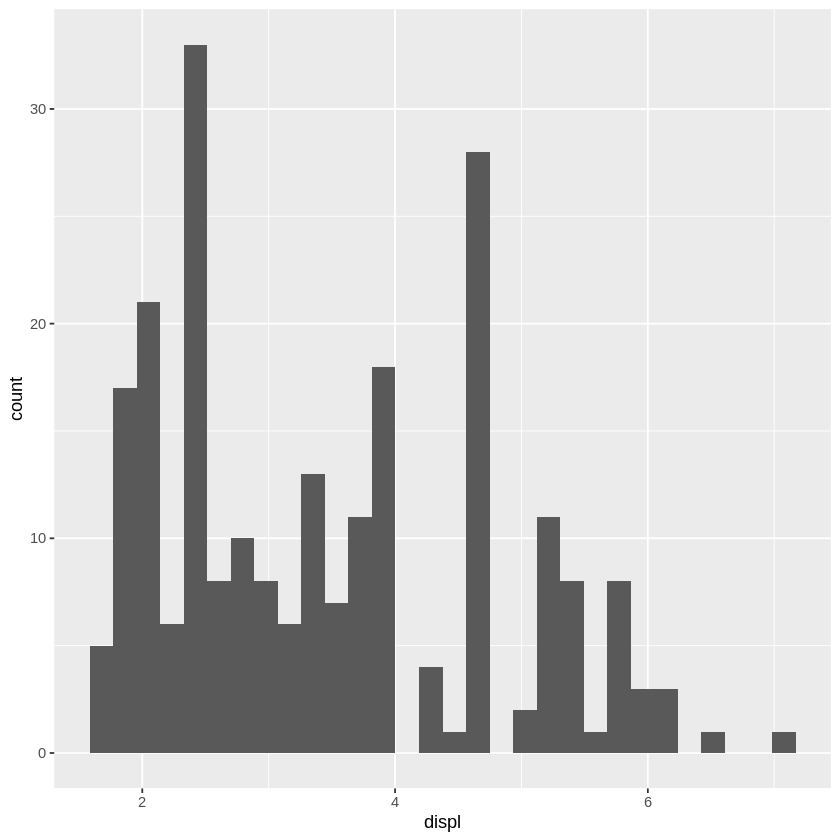

In [24]:
ggplot(data = mpg) +
  geom_histogram(mapping = aes(x = displ))
#+geom_histogram(mapping = aes(x = displ), bins = 15)
#+geom_histogram(mapping = aes(x = displ), binwidth = 0.10)

Modifica l'istruzione precedente modificando il valore del numero di classi `bins=30` con un diverso valore o modificandone l'ampiezza `binwidth`.
In alternativa agli istogrammi puoi produrre i cosiddetti *density plot*, tramite la `geom_density()` che può essere  considerata, senza troppo rigore, una rappresentazione continua dell'istogramma.

Come al solito `mapping=`, primo argomento di `aes()`, può essere omesso. Per mappare con diversi colori la colonna `drv`  puoi usare `colour =drv` o anche `fill=drv`.

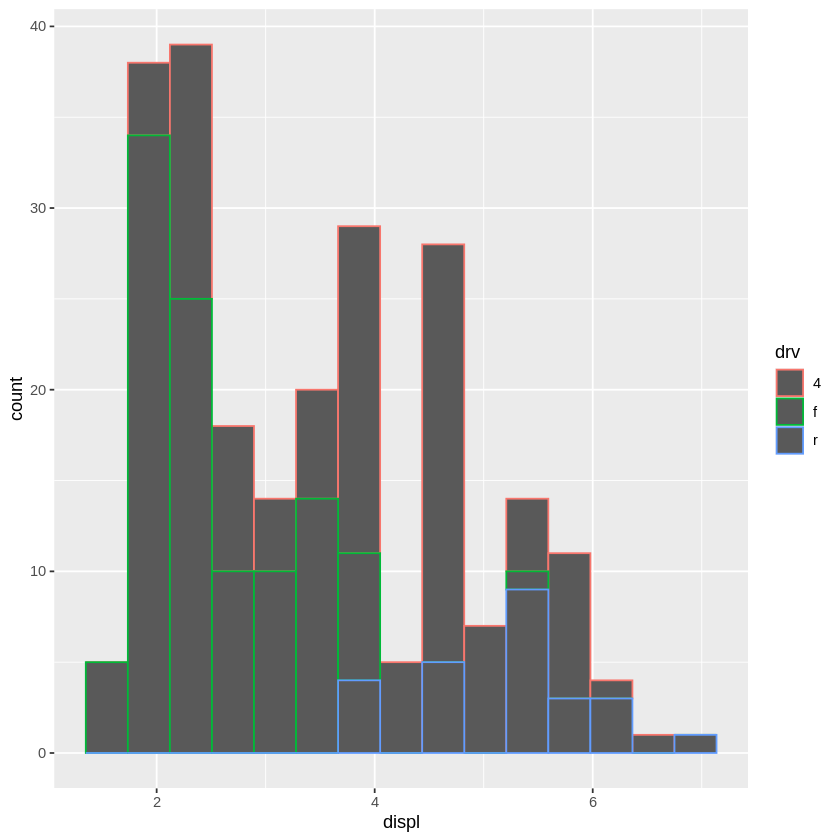

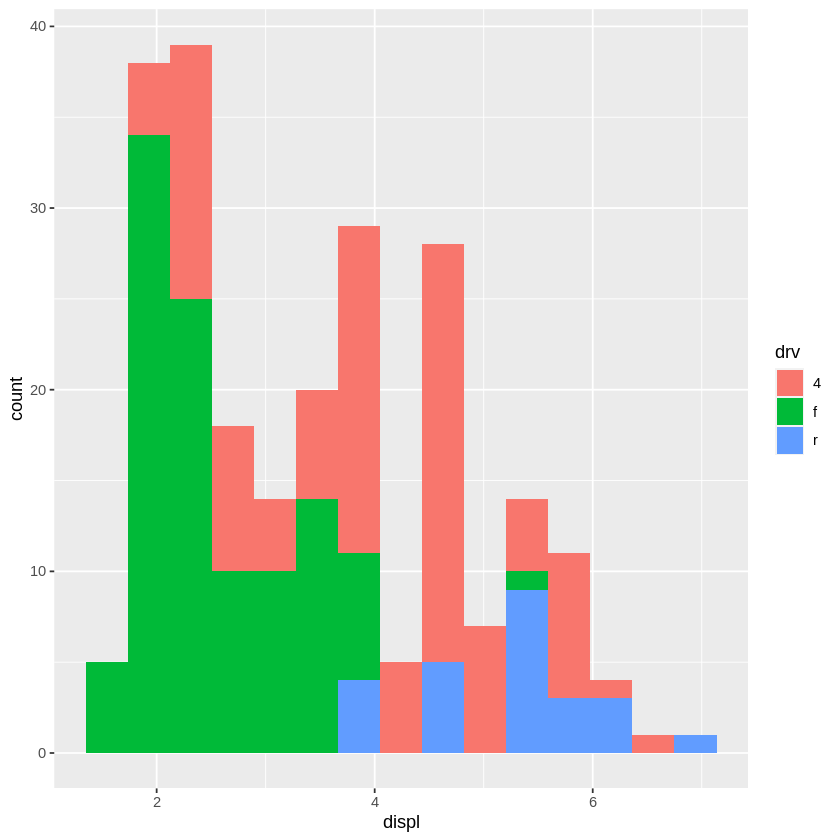

In [25]:
ggplot(mpg) +
  geom_histogram(aes(x = displ, colour = drv), bins = 15)

ggplot(data = mpg) +
  geom_histogram(mapping = aes(x = displ, fill = drv), bins = 15)

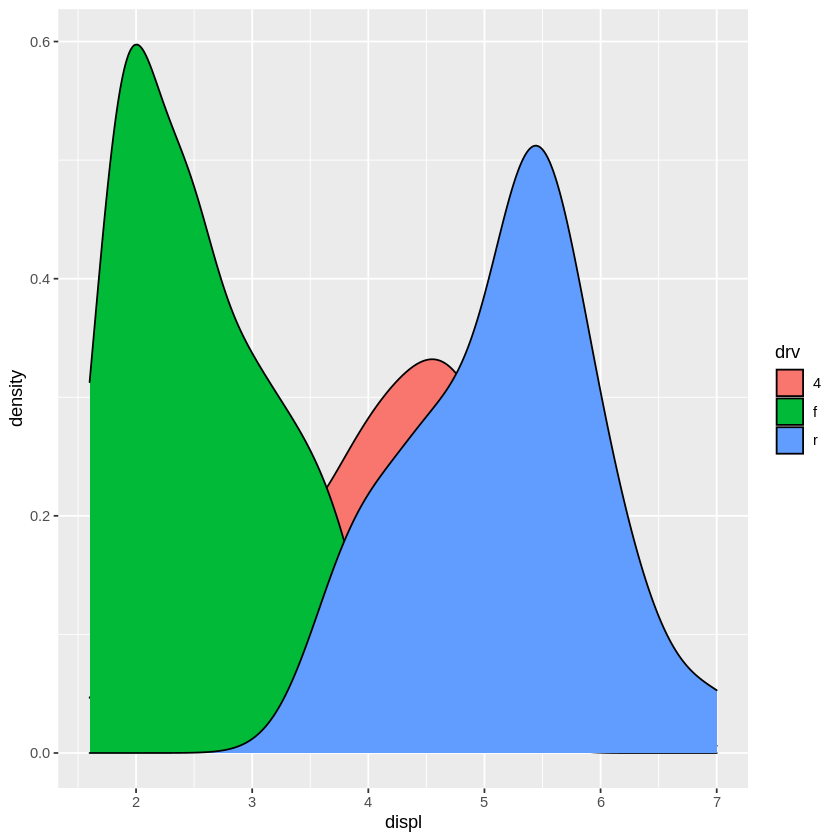

In [26]:
ggplot(data = mpg) +
  geom_density(mapping = aes(x = displ, fill = drv))

In questo esempio, in cui i *density plot* si sovrappongono per i diversi valori di `drv` , puoi usare l'argomento `alpha=` per controllarne la trasparenza. Dal momento che vogliamo  lo stesso valore di `alpha=` a tutti i dati, lo  inseriamo come argomento di `geom_density` e non di `aes()`, altrimenti genererebbe una voce inutile nella legenda.

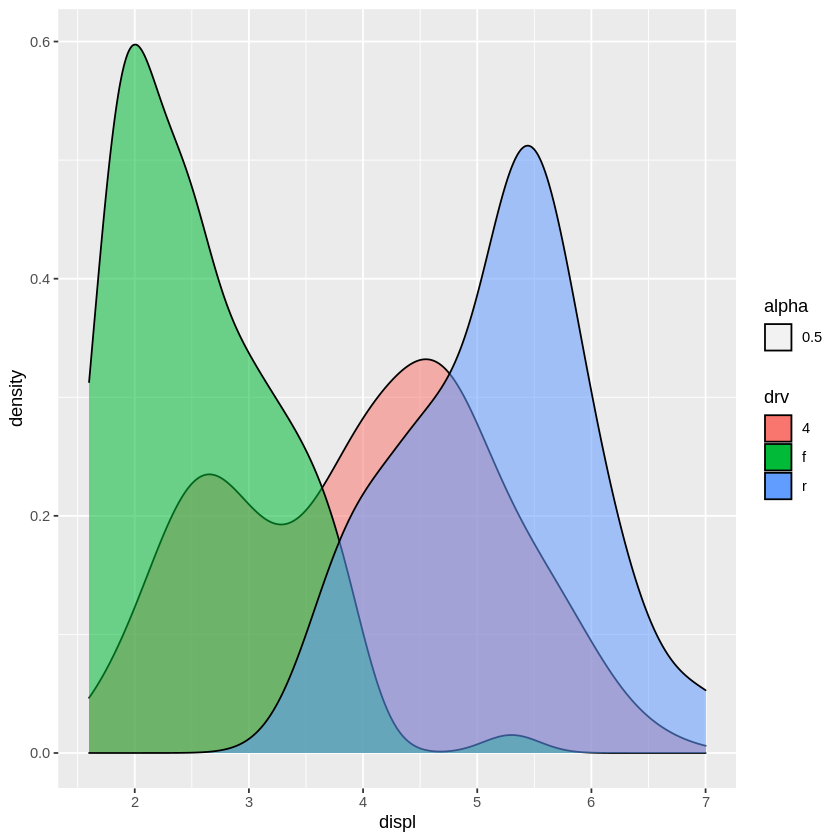

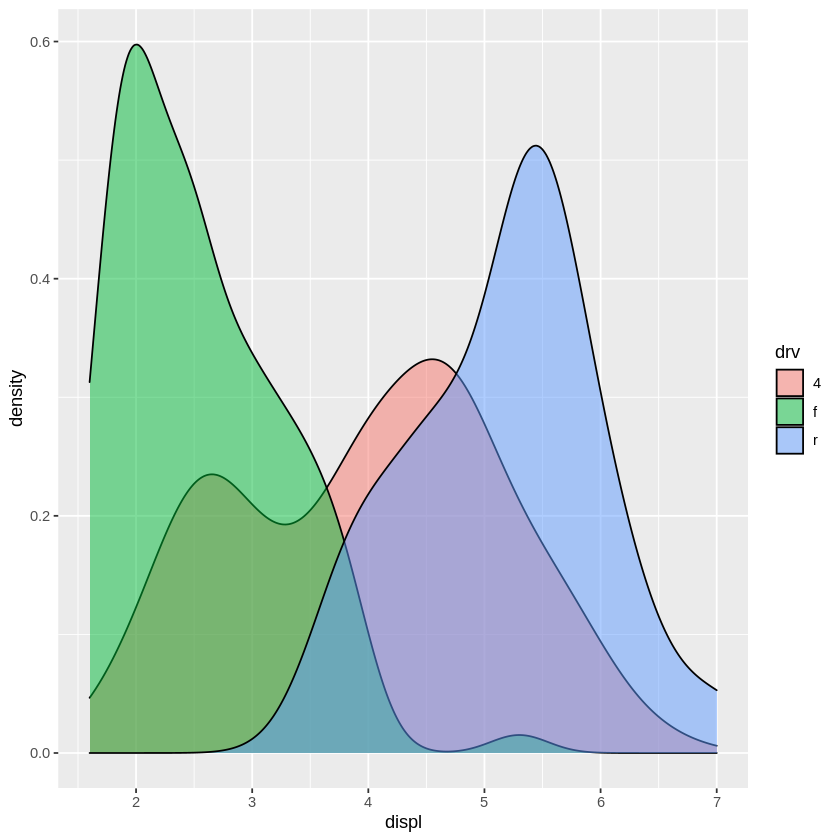

In [27]:
ggplot(data = mpg) +
  geom_density(mapping = aes(x = displ, fill = drv, alpha = .5)) 
  #genera una voce inutile nella legenda
  ggplot(data = mpg) +
  geom_density(mapping = aes(x = displ, fill = drv), alpha = .5)

### `geom_boxplot()`

Per produrre un boxplot, basta aggiungere un layer di tipo `geom_boxplot()` che richiede, come `geom_histogram()` e `geom_density()`, la definizione della sola `x=. geom_boxplot()` accetta ovviamente sia l'argomento `col=` che `fill=` in `mapping=aes()`.

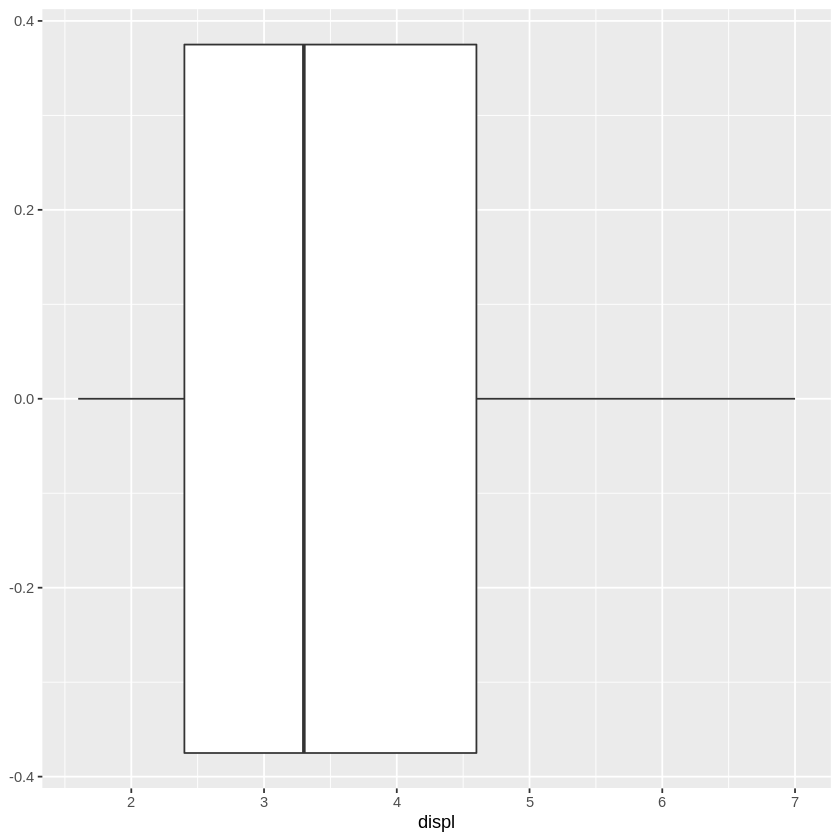

In [28]:
ggplot(data = mpg) +
  geom_boxplot(mapping = aes(x = displ))

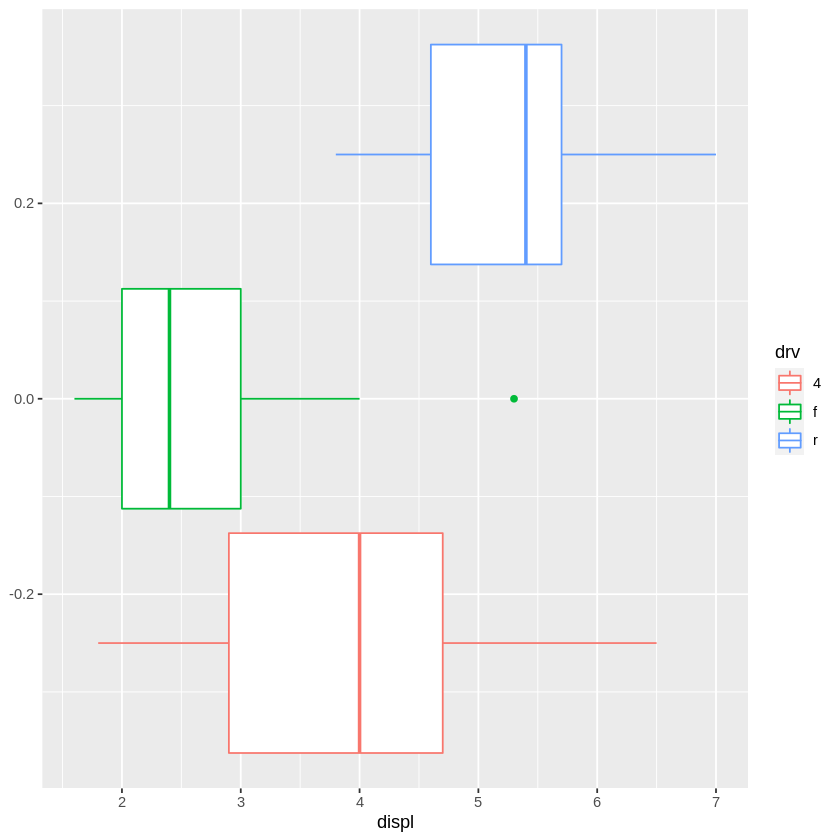

In [29]:
ggplot(data = mpg) +
  geom_boxplot(mapping = aes(x = displ, col = drv))

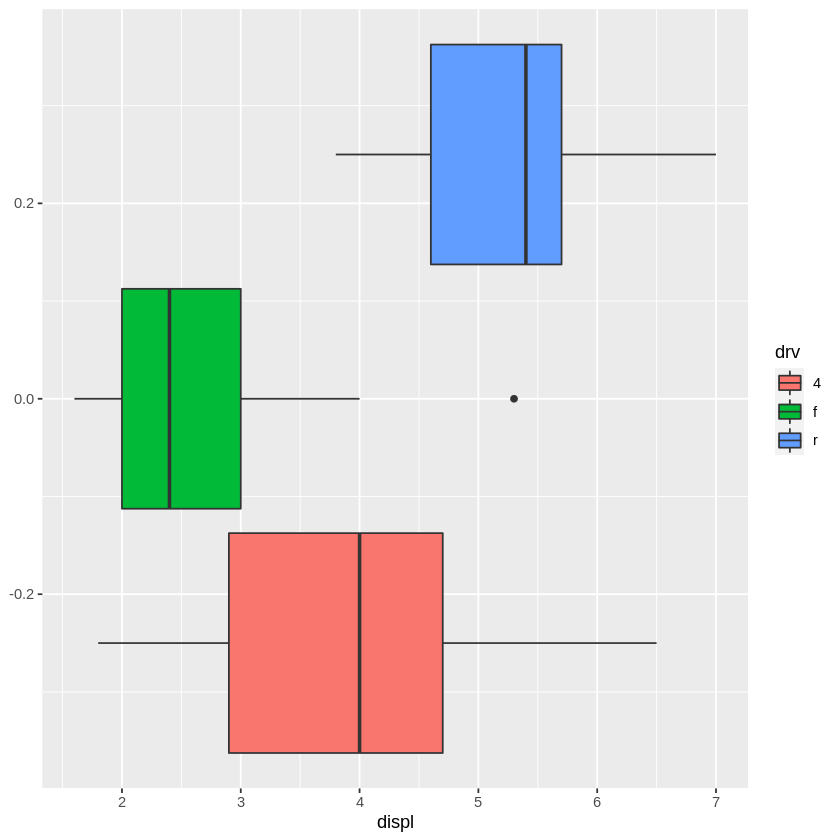

In [30]:
ggplot(data = mpg) +
  geom_boxplot(mapping = aes(x = displ, fill = drv))

### `geom_smooth()`

Attraverso `geom_smooth()` si aggiunge un layer contenente una *linea di tendenza* o di *regressione* che visualizzi l'eventuale relazione tra la variabile sull'asse x e quella sull'asse y. 
Tipicamente il layer  `geom_smooth()` si aggiunge a `geom_point`.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



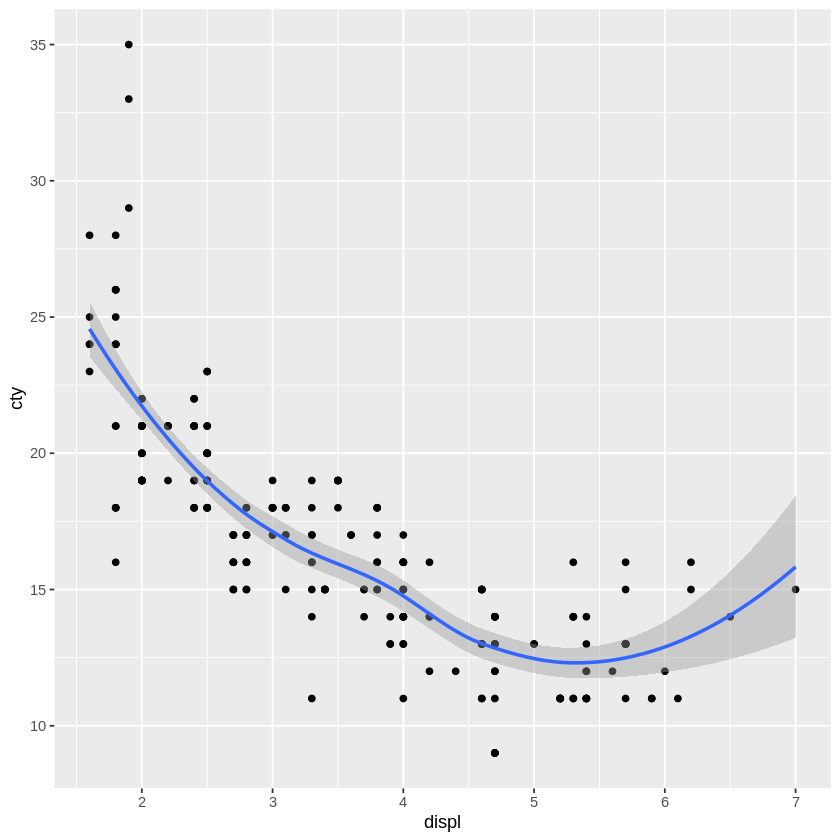

In [31]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = cty)) + 
  geom_smooth(mapping = aes(x = displ, y = cty))

NOTA: Come già osservato per `data=`, l'argomento `mapping=` inserito direttamente in `ggplot()`, viene ereditato da tutti i layer successivi.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



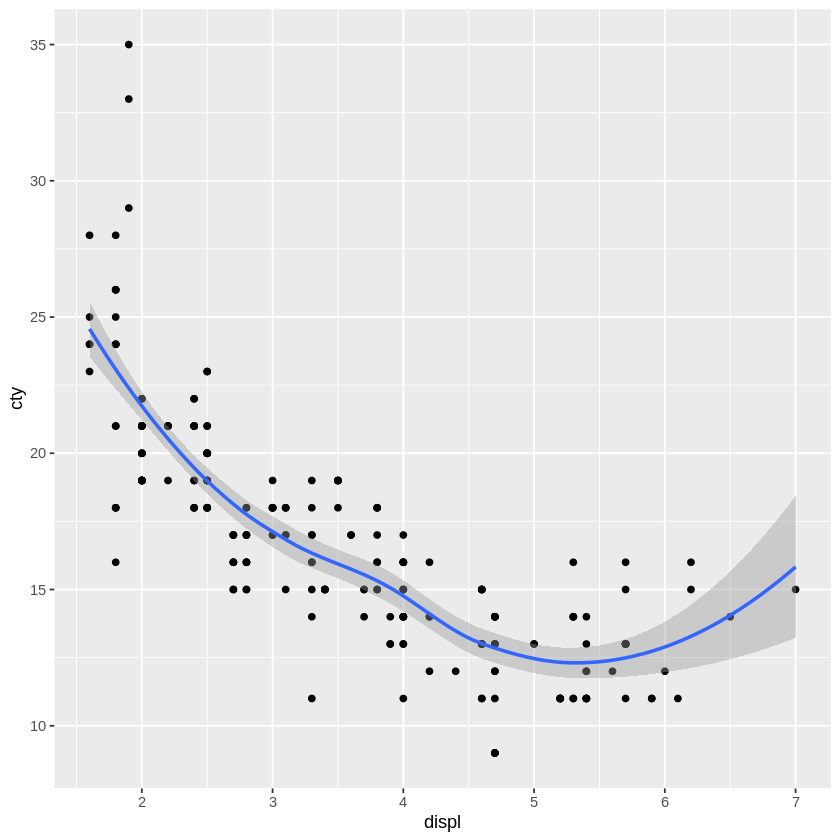

In [32]:
ggplot(data = mpg, mapping = aes(x = displ, y = cty)) +
  geom_point() + 
  geom_smooth()

La linea di tendenza viene stimata, se non diversamente specificato, con un metodo scelto automaticamente sulla base della numerosità dei dati e dei differenti gruppi. 
Nell'ambito della week 3 in cui tratteremo l'apprendimento automatico supervisionato (supervised learning), ti darò un'idea del metodo più semplice per la stima di una linea di tendenza, detto metodo dei minimi quadrati, che può essere  specificato direttamente mediante `method="lm"` tra gli argomenti di `geom_smooth()`.  `method="lm"` sta per *linear model* in quanto, come vedremo, si riferisce alla retta di regressione *lineare* (semplice).

### ggplot(data = mpg, mapping = aes(x = displ, y = cty)) +
  geom_point() + 
  geom_smooth(method = "lm")

A questo punto, puoi pensare di usare in modo combinato l'argomento  `mapping=`  incluso in `ggplot()` e quello  dei singoli layer. Nel prossimo esempio, il layer `geom_smooth()` ha un argomento mapping aggiuntivo a quello incluso in `ggplot()` per diagrammare le linee di tendenza oltreché in base a `colour = drv`  (incluso in `ggplot()`) anche in base a `linetype=drv` (incluso in `geom_smooth()`).

`geom_smooth()` using formula 'y ~ x'



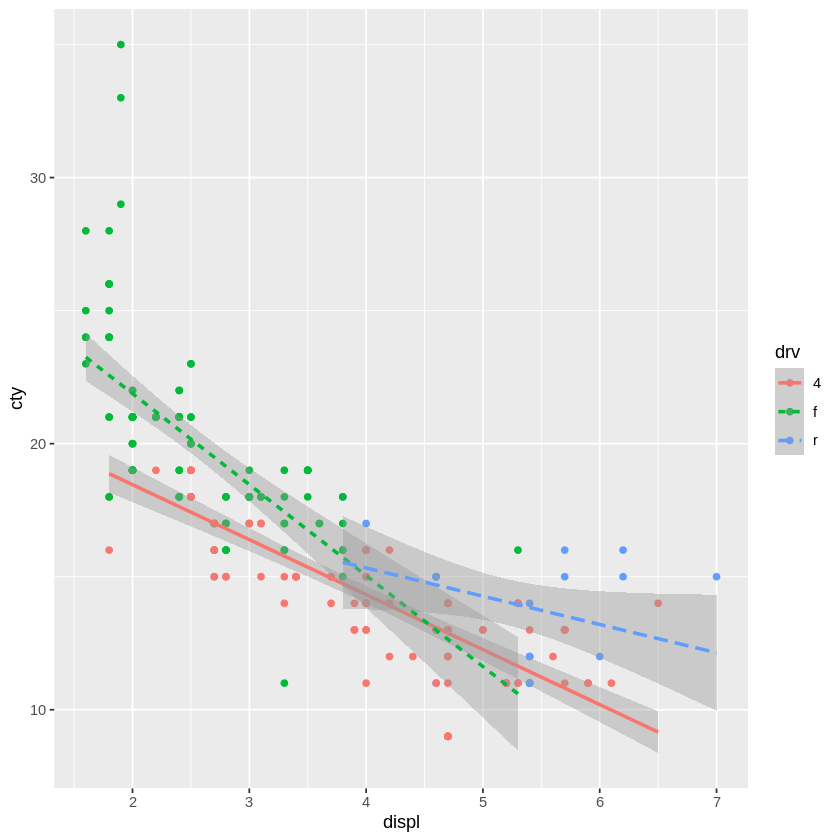

In [33]:
ggplot(data = mpg, mapping = aes(x = displ, y = cty, colour = drv)) +
  geom_point() + 
  geom_smooth(mapping = aes(linetype = drv), method = "lm")

### `geom_bar/geom_col`

Di seguito ti mostro l'uso dei layer `geom_bar()` e `geom_col()`, che visualizzano diagrammi a barre per dati categorici. Nell'esempio seguente, con `geom_bar()` visualizzi il numero di osservazioni in ciascuna categoria della variabile `class` del data set `mpg`, attraverso un diagramma a barre verticali, mappando `x=class`, o orizzontali, mappando `y=class`.

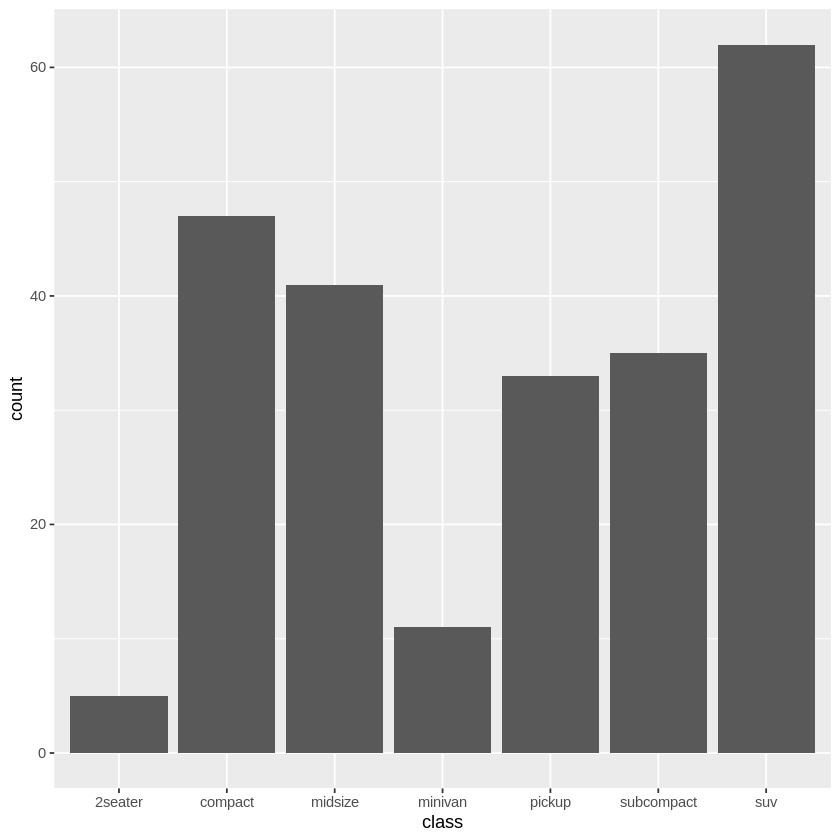

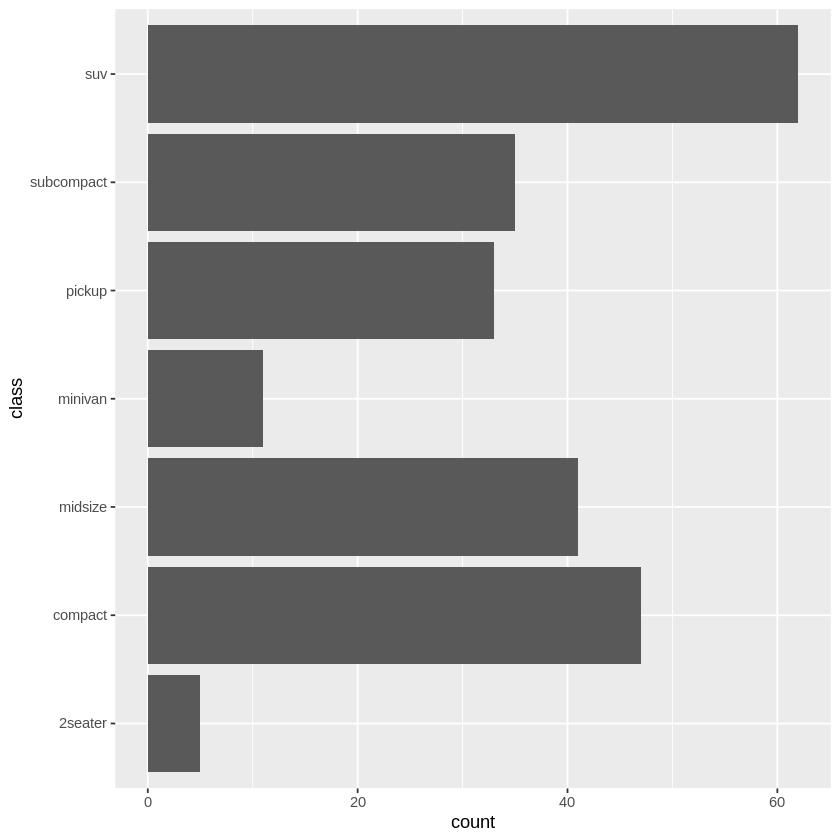

In [34]:
ggplot(data = mpg) +
  geom_bar(mapping = aes(x = class))

ggplot(data = mpg) +
  geom_bar(mapping = aes(y = class))

Alternativamente, puoi contare il numero di osservazioni in ciascuna categoria della variabile `class` usando la funzione `count()` di  `dplyr`

In [35]:
mpg %>% 
  count(class)

class,n
<chr>,<int>
2seater,5
compact,47
midsize,41
minivan,11
pickup,33
subcompact,35
suv,62


che genera un data frame di 7 righe (una per ogni livello della variabile `class`) e 2 colonne: la prima coi livelli di `class`, la seconda con il corrispondente numero di osservazioni denominata `n`. 
Questo data frame diventa quindi argomento di `ggplot() + geom_col()`, in cui è necessario mappare, a differenza di  `geom_bar`, anche  `y=n`.

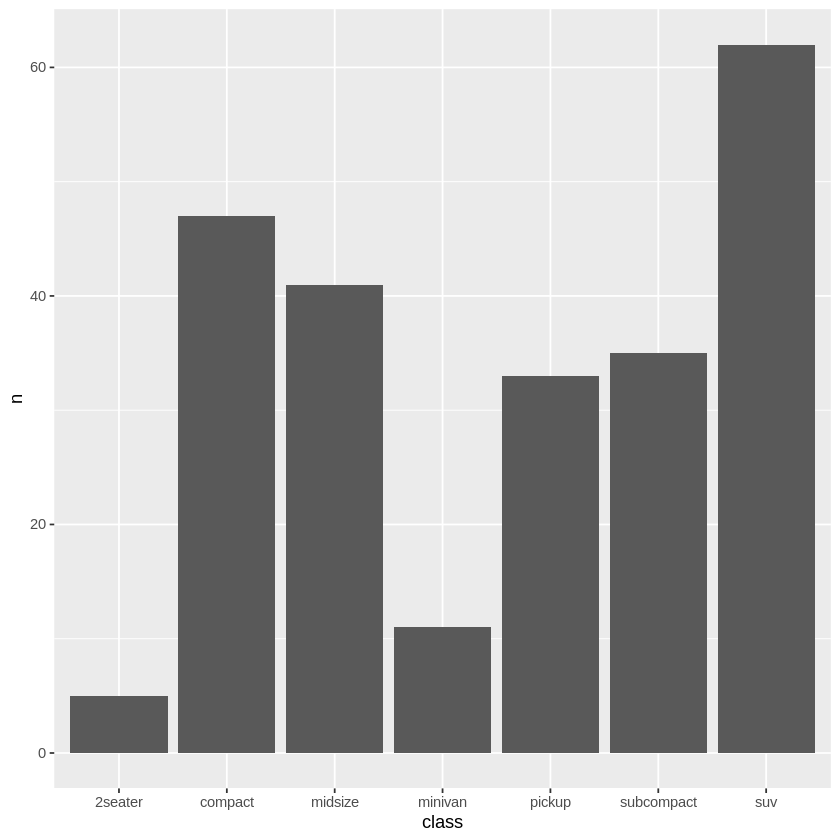

In [36]:
mpg %>% 
  count(class) %>% 
  ggplot + 
  geom_col(mapping = aes(x = class, y = n))

A questo punto potresti chiederti come fare a visualizzare le barre in ordine crescente. 
Devi, per prima cosa, ordinare il dataframe `mpg %>% count(class)` in base ad `n` applicando la funzione base `arrange()`.
Estrai quindi la colonna `class` che ottieni dopo l'ordinamento, come vettore (di caratteri) attraverso la funzione `pull(class)`.

In [37]:
mpg %>%
 count(class) %>%
        arrange(n) %>%
                pull(class)

[1] "2seater"    "minivan"    "pickup"     "subcompact" "midsize"   
[6] "compact"    "suv"

L'idea ora è usare `ggplot + geom_bar()` applicato al data set `mpg` con la variabile/colonna `class` convertita in una variabile di tipo categorico (*factor*) attraverso la funzione di base `factor()`, in cui  assegni all'argomento `levels=` il vettore di caratteri ottenuto dal codice precedente.
Nota: `levels=` richiede un vettore di caratteri, non un data frame. Pertanto, l'esempio non funziona se usi  `select()` al posto di `pull()`. Il tutto è sintetizzato nell'esempio seguente.

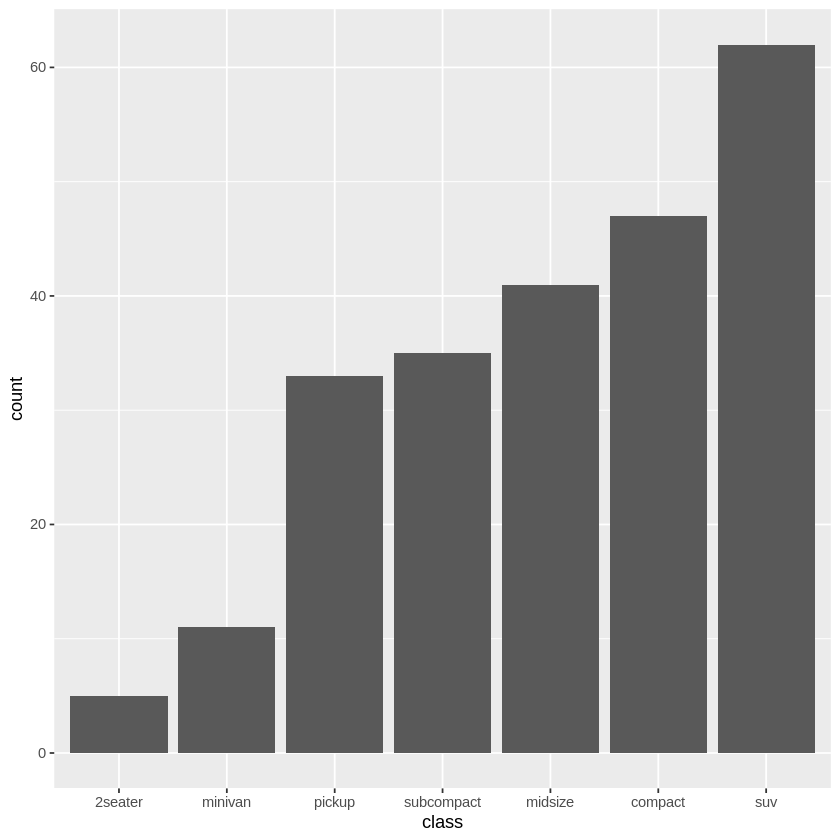

In [38]:
mpg %>%
    mutate(class = factor(class, levels = mpg %>%
                                            count(class) %>%
                                                arrange(n) %>%
                                                    pull(class))) %>% 
    ggplot + 
    geom_bar(mapping = aes(x = class))

Anche con `geom_bar` puoi usare tutti gli argomenti di `aes()` per visualizzare informazioni congiunte, come per esempio la colonna `fl`

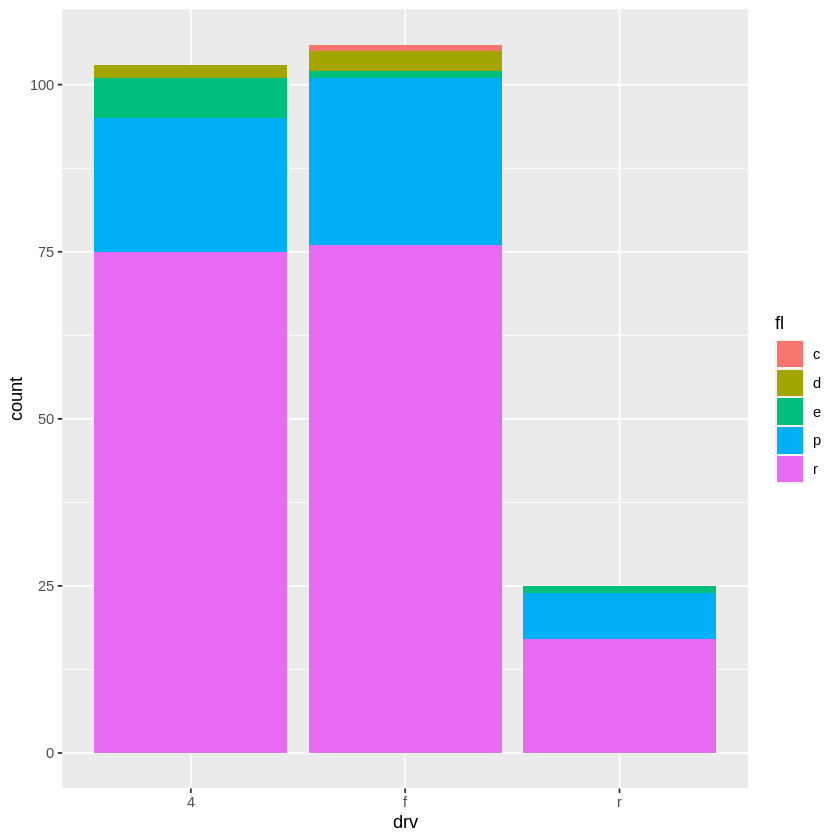

In [39]:
ggplot(data = mpg) +
  geom_bar(mapping = aes(x = drv, fill = fl))

e puoi posizionare le barre in modo differente, specificando l'argomento `position`.

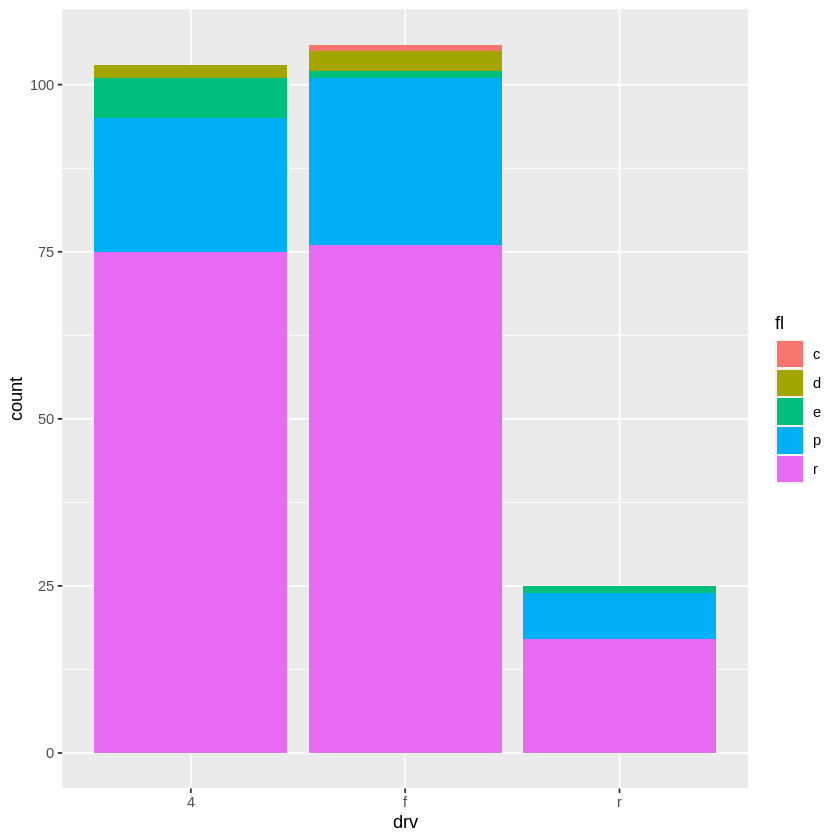

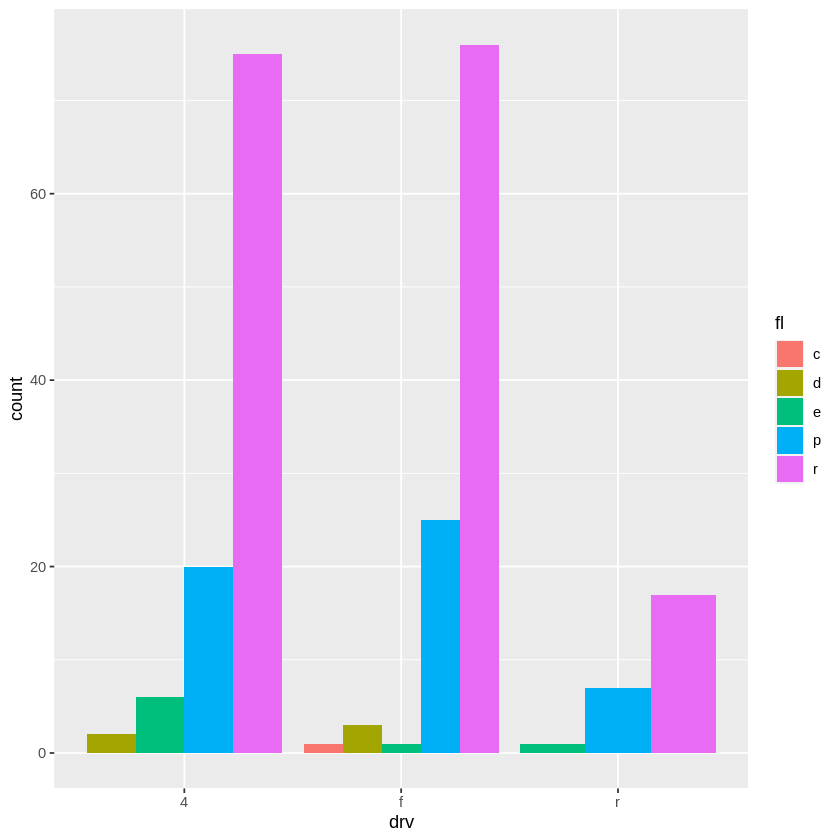

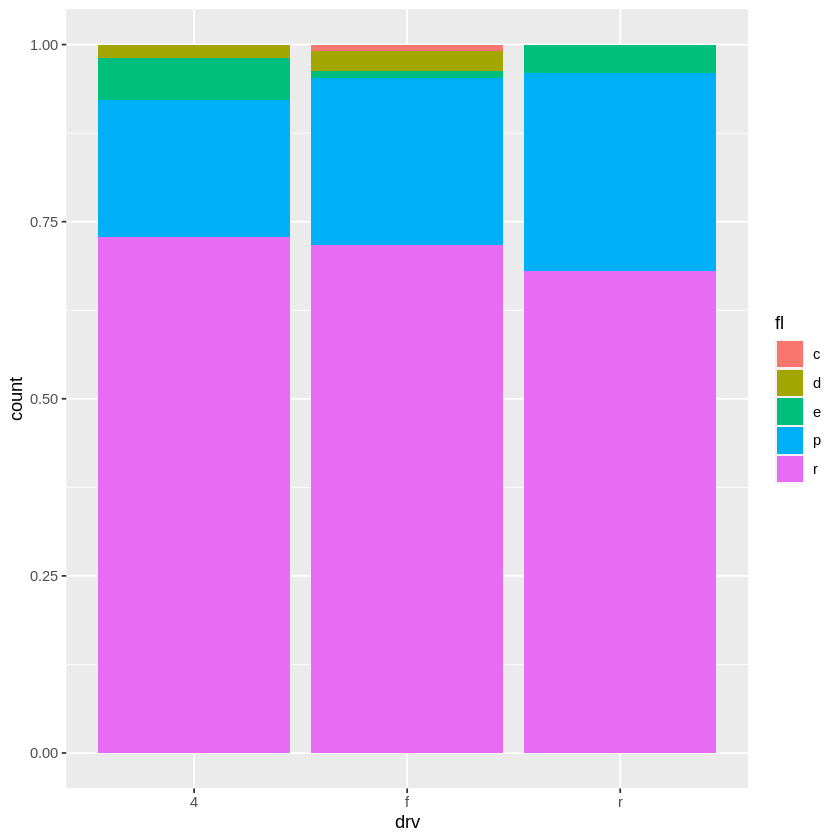

In [40]:
ggplot(data = mpg) +
  geom_bar(mapping = aes(x = drv, fill = fl), position = "stack") ## default

ggplot(data = mpg) +
  geom_bar(mapping = aes(x = drv, fill = fl), position = "dodge")

ggplot(data = mpg) +
  geom_bar(mapping = aes(x = drv, fill = fl), position = "fill")


## Facet

In aggiunta ai layer di tipo geometry, esistono i layer di tipo *facet*, che permettono di ripetere un grafico stratificando rispetto ad una variabile categorica (`factor`), generando tanti grafici (*subplot*) quanti sono i livelli della variabile categorica. Se la variabile rispetto a cui si vuole stratificare è di altro tipo, viene automaticamente convertita in `factor` ed il grafico viene ripetuto stratificando rispetto ad ognuno dei suoi livelli. Pertanto, non è mai consigliabile stratificare rispetto ad una variabile numerica continua.  
I layer più conosciuti di tipo facet sono `facet_wrap()` e `facet_grid()`.

### `facet_wrap()`

Per esempio se vuoi uno scatter plot delle variabili `hwy` contro `displ`, stratificato per ognuno dei livelli della variabile `class`, aggiungi un layer di tipo `facet_wrap()` con argomento `facets = . ~ class`. 
Nota: Il segno `~` si ottiene mediante scorciatoia ALT+5 o ALT+126.

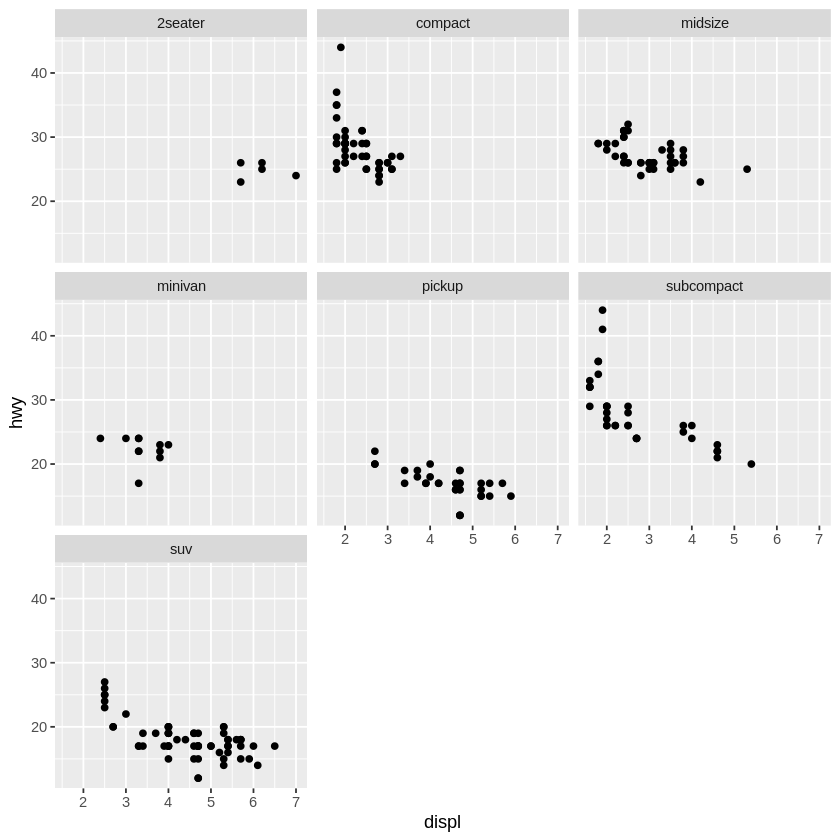

In [41]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(facets = . ~ class)

Hai la possibilità di visualizzare i dati e ripetere il diagramma di tuo interesse stratificando in base alle combinazioni dei livelli di più di una variabile categorica. Per esempio, puoi stratificare in base alle combinazioni dei livelli delle variabili `drv` e `fl`, usando come argomento  `facets = . ~ drv + fl`.

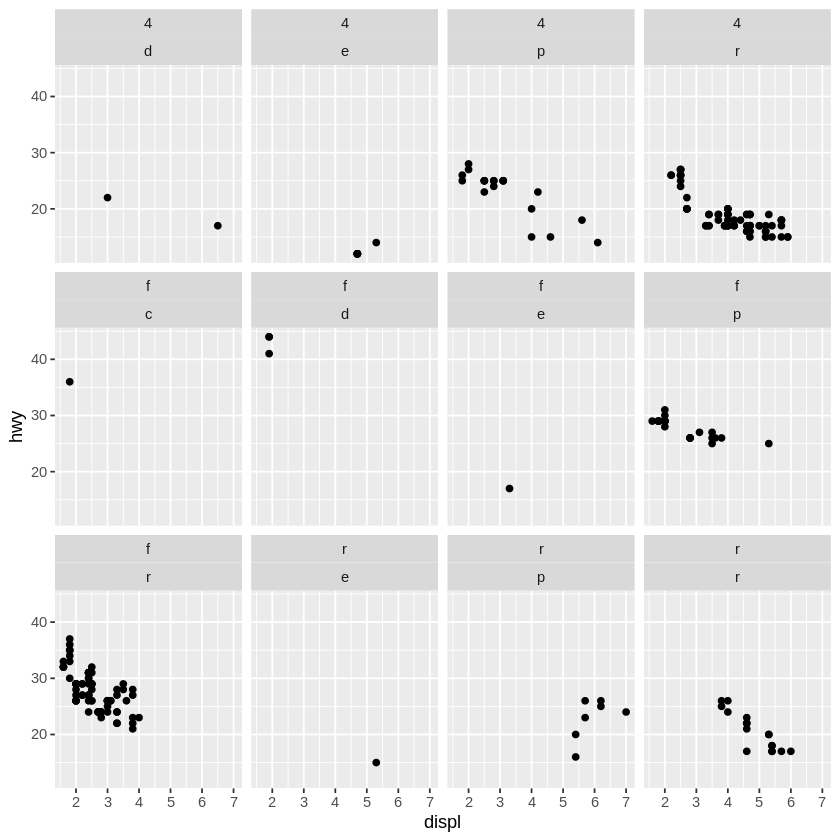

In [42]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
   facet_wrap(facets = . ~ drv + fl)

Prova a modificare il codice e a dare come argomento `facets=` le diverse combinazioni di `drv`, `fl` e `class`.

### `facet_grid()`

Con il layer `facet_grid()` invece,  puoi visualizzare  una matrice di grafici decidendo quale variabile categorica riportare sulle righe e quale sulle colonne. Nell'esempio seguente, gli scatter plot `hwy/displ`  sono stratificati in una matrice di grafici in cui le variabili  `fl` e `drv`  sono riportate sulle righe e colonne, rispettivamente, mediante l'argomento  `facets =  fl ~ drv`.

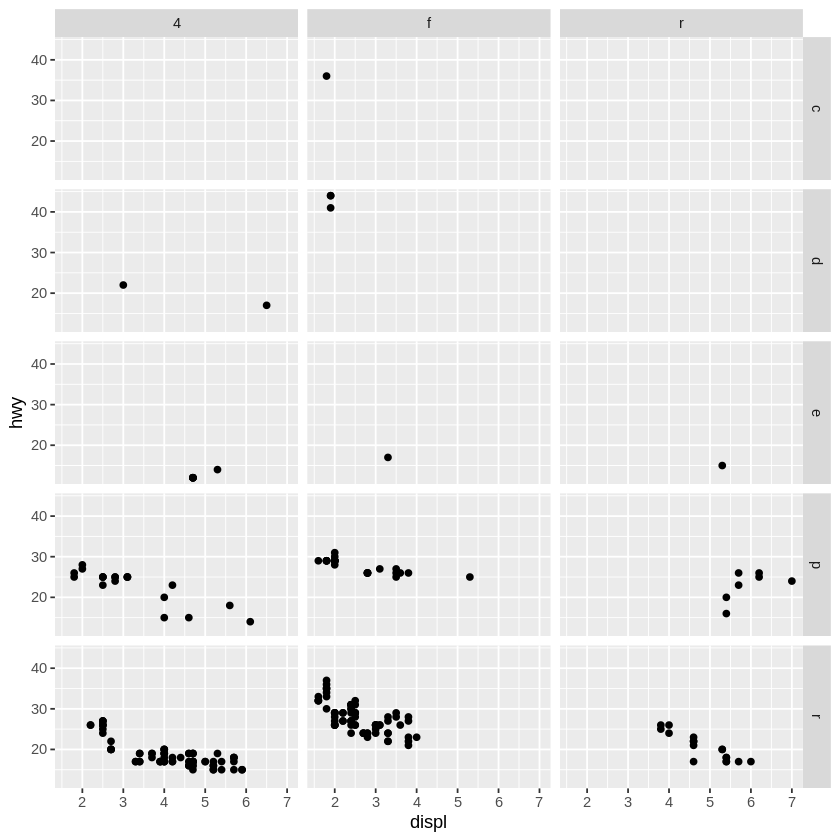

In [43]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_grid(facets = fl ~ drv)

## Altri elementi di *grammar of graphics*

Complimenti! Sei giunto alla fine di questa importante introduzione alla *grammar of graphics*. Tuttavia, come immaginerai, esistono altri importanti layer ed elementi come ad esempio i layer 

* `theme()`
* `coordinates()`
* `scales()`
* `statistics()`

Io uso `theme()` e `scales()` di continuo. Probabilmente, lo farai anche tu.
A partire da quanto spiegato tramite gli esempi di questa lezione introduttiva alla visualizzazione dei dati, non ti sarà difficile espandere quanto appreso ad altri layer ed altri elementi di `ggplot()`, sempre in via di aggiornamento. 

## Matrici di grafici
Se invece avessi bisogno di affiancare, in una matrice, più grafici ottenuti mediante `ggplot()` devi affidarti allla funzione `wrap_plots()` contenuta nel pacchetto `patchwork`. 
Per utilizzare `wrap_plots()` bisogna creare una lista contenete i grafici di interesse, assegnandoli ad una variabile.

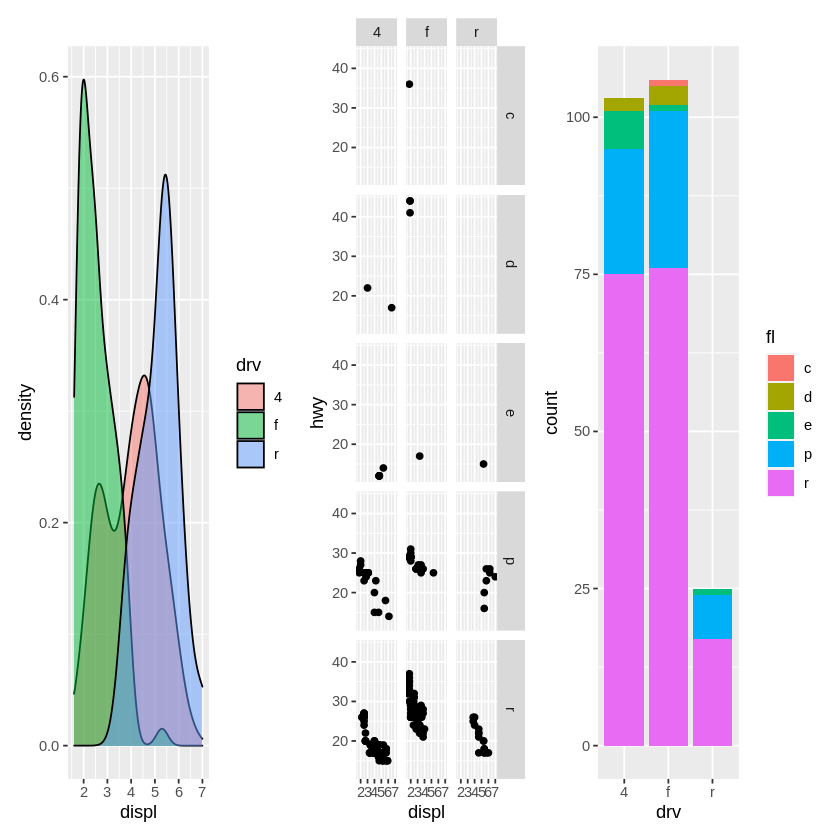

In [44]:
p1 <- ggplot(data = mpg) +
  geom_density(mapping = aes(x = displ, fill = drv), alpha = .5)

p2 <- ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_grid(facets = fl ~ drv)

p3 <- ggplot(data = mpg) +
  geom_bar(mapping = aes(x = drv, fill = fl))

plot_list <- list(p1,p2,p3)
wrap_plots(plot_list)
#oppure wrap_plots(p1,p2,p3)

## Scatter plot matrix con `ggpairs()`

Per esplorare un data set di variabili numeriche è utile esplorare una matrice di grafici a dispersione (*scatter plot matrix*) di tutte le coppie di variabili. Purtroppo, `ggplot2` non dà la possibilità di visualizzare  la scatter plot matrix. 
Puoi utilizzare il comando di base `plot()`, applicato per esempio al data set `iris`, ed ottenere la scatter plot matrix tra tutte le variabili numeriche presenti nel data set (escludiamo perciò la colonna `Species`).

[1] "factor"

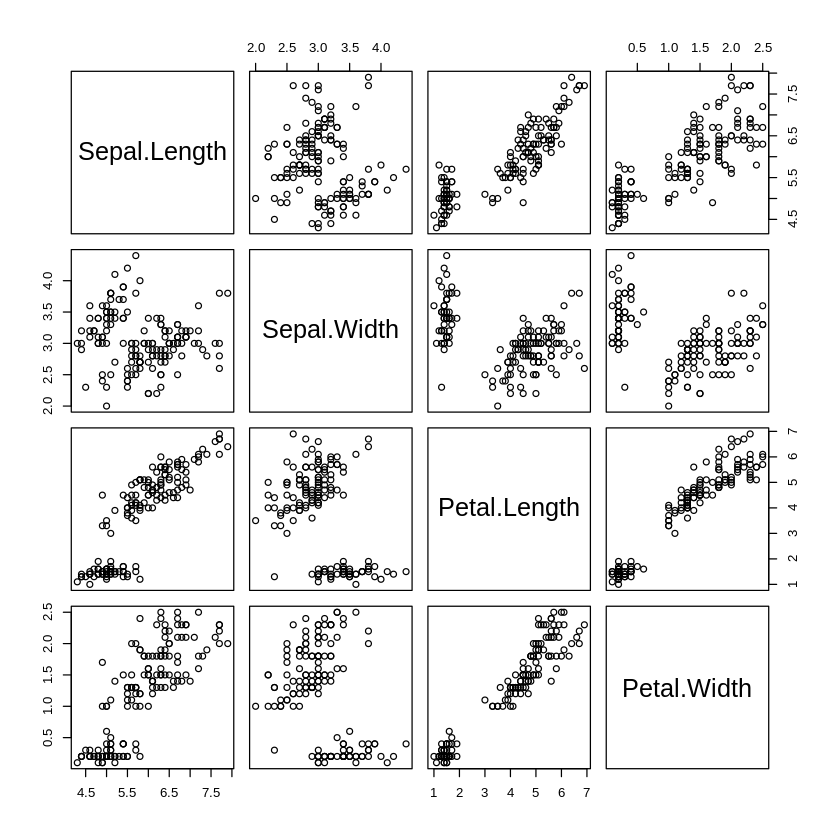

In [45]:
iris %>% select(-Species) %>% plot()
class(iris$Species)

Oppure puoi affidarti al pacchetto `GGally` (già preinstallata mediante l'istruzione `library(GGally)`) che fornisce la funzione `ggpairs()`.
`ggpairs()` ha una sintassi simile a `ggplot()`, come puoi vedere dall'esempio seguente. 
L'argomento `progress = FALSE` permette di nascondere l'indicatore di progresso/avanzamento del plot (prova per esercizio a modificare il valore da `FALSE` a `TRUE`).

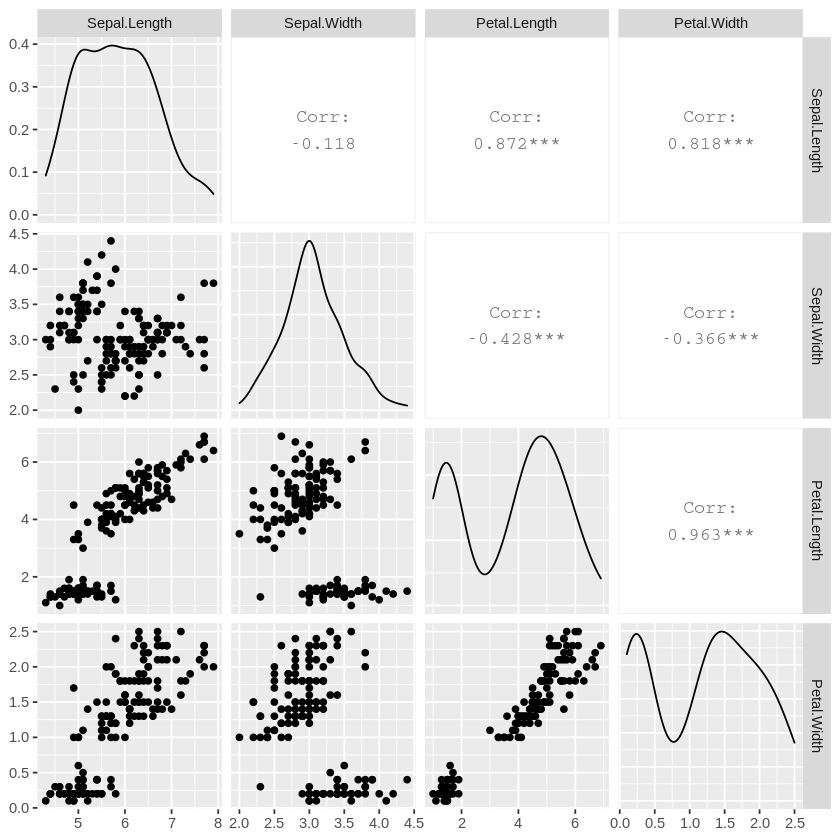

In [46]:
iris %>% select(-Species) %>% ggpairs(progress = FALSE)

Se non ti risulta intuitiva l'interpretazione di tale visualizzazione, devi aspettare la lezione sull'analisi delle componenti principali (PCA), dove cercheremo di illustrarne l'utilizzo e i limiti, attraverso un esempio su un data set reale. Gli elementi al di sopra della diagonale principale, rappresentano gli elementi della *matrice di correlazione* che introdurremo nella prima lezione della prossima *week*.

## Errori comuni

### Inserire gli argomenti delle funzioni `geom_` dentro o fuori `aes()`

Cerca di focalizzare la tua attenzione sulla differenza tra l'uso degli argomenti `colour=/shape=/size=/fill=` dentro e fuori `aes()`, ma comunque dentro il layer di tipo geometry. Considera per fissare le idee `geom_point()`.

Se vuoi colorare i punti a seconda dei gruppi, devi invece fornire il nome della colonna (per esempio mpg) del data frame, inserendo `colour=` all'interno di `aes()`. Vediamo due esempi in cui i punti sullo scatter plot `displ/hwy` sono colorati in base ad una variabile di raggruppamento continua `cyl` ed una categorica `fl`.

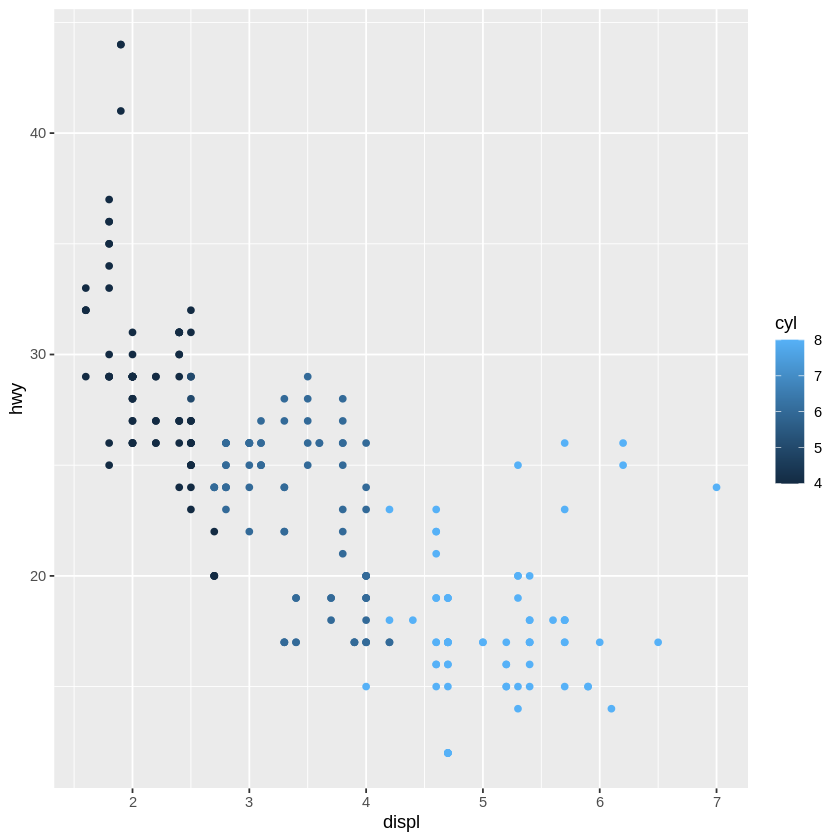

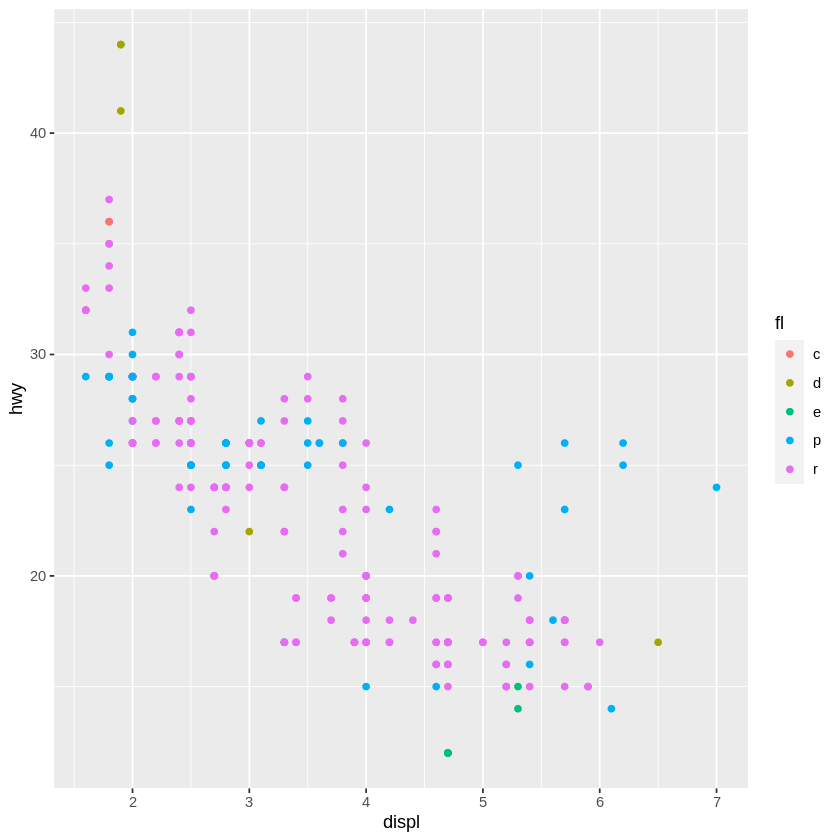

In [47]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy, colour = cyl))

  ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy, colour = fl))

Se invece vuoi cambiare il colore a tutti i punti, per esempio da nero (predefinito) a blu, è possibile usare l'argomento `colour=`  all'esterno di `aes()`

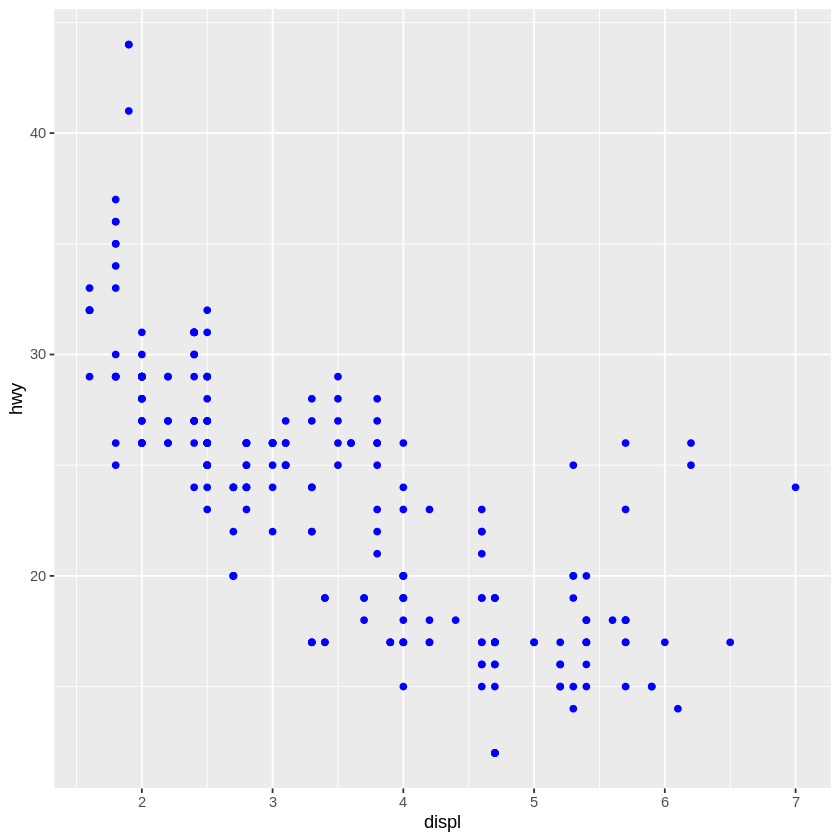

In [48]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy), colour = "blue")

Erroneamente, potresti provare a generare il grafico precedente con la seguente istruzione

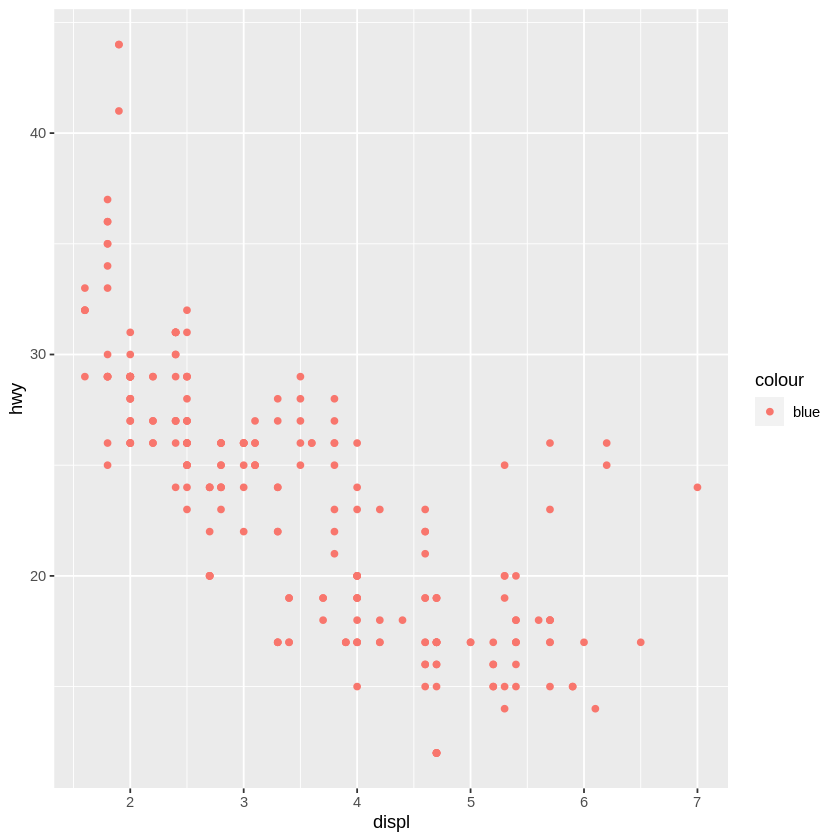

In [49]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy, colour = "blue"))

Questo output apparentemente strano mi dà la possibilità di spiegarti la logica che c'è dietro l'istruzione, traducendola in 

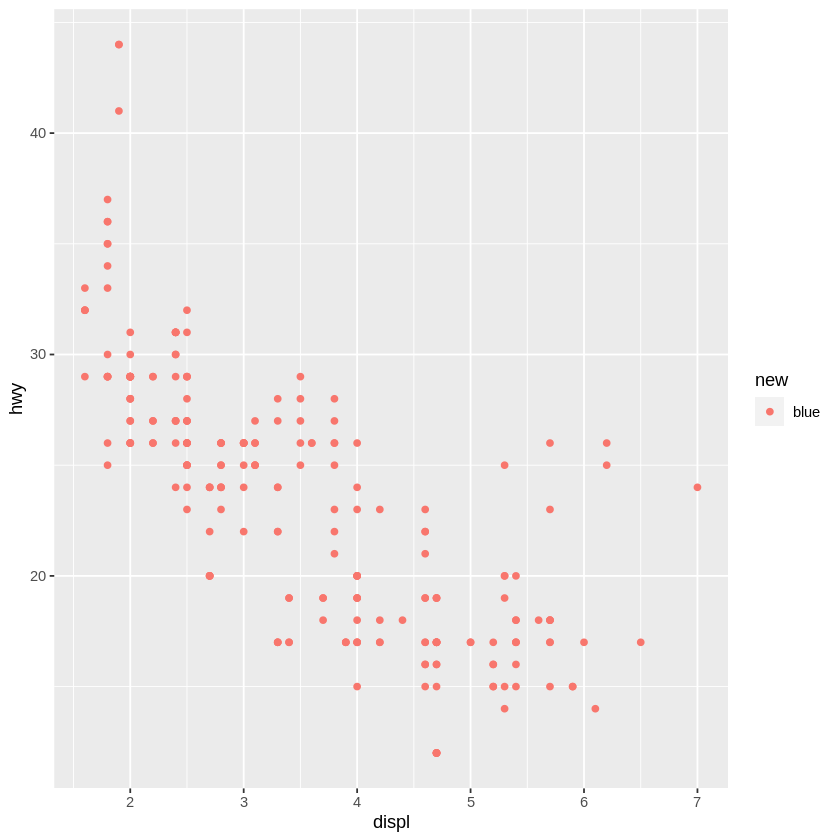

In [50]:
mpg %>% 
  mutate(new = "blue") %>% ## creates a column with all "blue" values
  ggplot() +
  geom_point(mapping = aes(x = displ, y = hwy, colour = new))

È chiaro ora che inserire l'argomento `colour = "blue"` all'interno di `aes()` è equivalente alla creazione di una nuova variabile `new` nel data frame, con tutti i valori uguali a `"blue"`, usata come variabile di raggruppamento categorica con una singola categoria `"blue"` all'interno di `aes()`.

### Usare l'operatore `+` nel posto sbagliato

ERROR: Error: Cannot use `+.gg()` with a single argument. Did you accidentally put + on a new line?


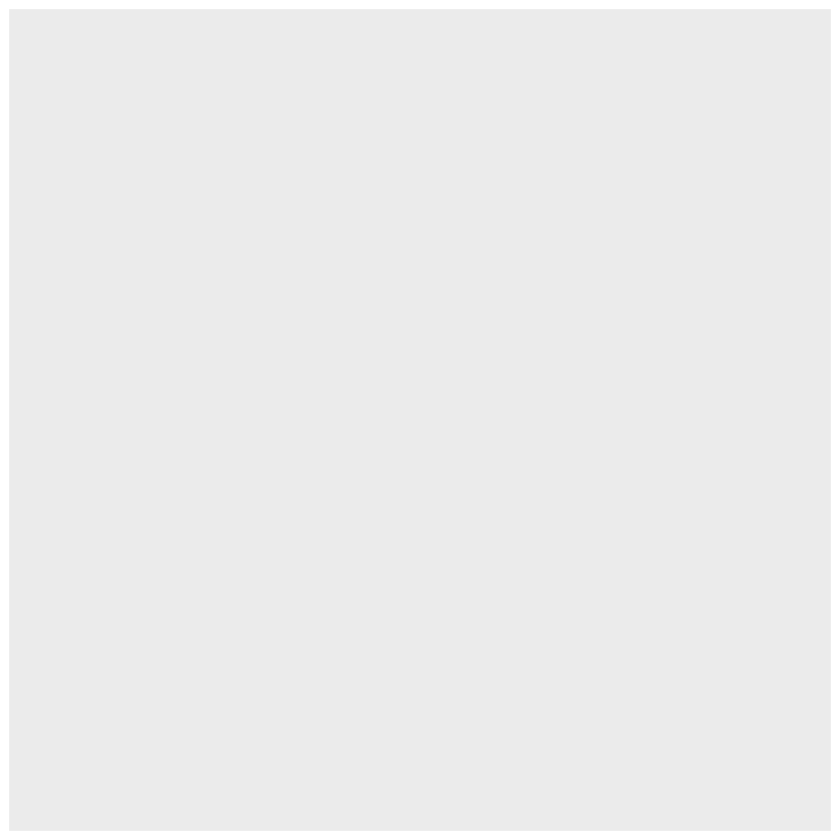

In [51]:
## non funziona
ggplot(data = mpg)
+ geom_point(mapping = aes(x = displ, y = cty))

### Usare `%>%` invece di `+`

In [52]:
## non funziona
ggplot(data = mpg) %>% 
geom_point(mapping = aes(x = displ, y = cty))

ERROR: Error: `data` must be a data frame, or other object coercible by `fortify()`, not an S3 object with class gg/ggplot
